<a href="https://colab.research.google.com/github/vinkrishna/ExpandingSenses/blob/main/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1: Signal and Signal Analysis: Amplitude, Frequency, Phase, and Time-Domain Analytical Methods




## 3.2 Overview of Signal 

# Amplitude
Amplitude is the maximum value of a signal's waveform from the mean or zero value. The amplitude can be expressed as the peak value, peak-to-peak value, or root mean square (RMS) value. The amplitude can provide useful information about the signal's strength or energy.

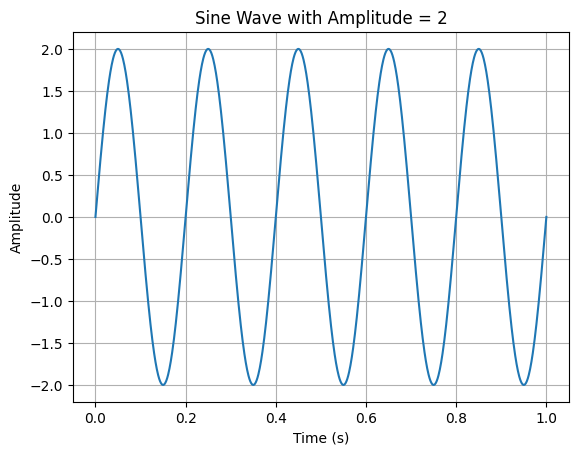

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sine wave
t = np.linspace(0, 1, 1000)  # Time vector
freq = 5  # Frequency (Hz)
amp = 2  # Amplitude
phase = 0  # Phase (radians)
y = amp * np.sin(2 * np.pi * freq * t + phase)

# Plot the signal
plt.plot(t, y)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sine Wave with Amplitude = 2")
plt.grid(True)
plt.show()


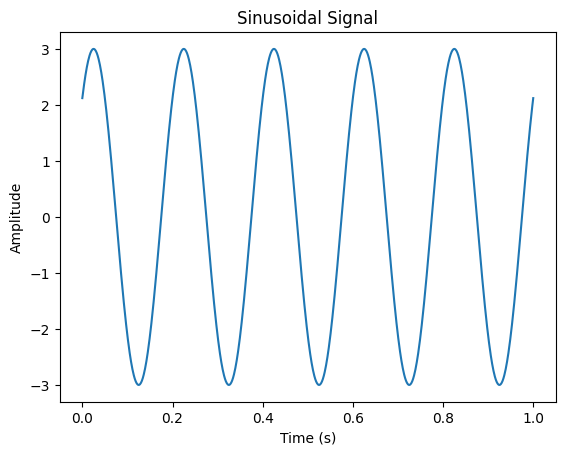

Peak Amplitude: 2.9978777525277454
Peak-to-Peak Amplitude: 5.999990728716487
RMS Amplitude: 2.1213203435596424


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sinusoidal signal
t = np.linspace(0, 1, 1000)
f = 5  # frequency in Hz
A = 3  # amplitude
phi = np.pi / 4  # phase

signal = A * np.sin(2 * np.pi * f * t + phi)

# Calculate amplitude
peak_amplitude = np.max(signal) - np.mean(signal)
peak_to_peak_amplitude = np.max(signal) - np.min(signal)
rms_amplitude = np.sqrt(np.mean(np.square(signal)))

# Plot the signal
plt.plot(t, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sinusoidal Signal')
plt.show()

print(f"Peak Amplitude: {peak_amplitude}")
print(f"Peak-to-Peak Amplitude: {peak_to_peak_amplitude}")
print(f"RMS Amplitude: {rms_amplitude}")


#Frequency
Frequency is the number of cycles per unit of time, often measured in Hertz (Hz). In signal analysis, the frequency domain representation can help identify the signal's main frequency components or harmonics.

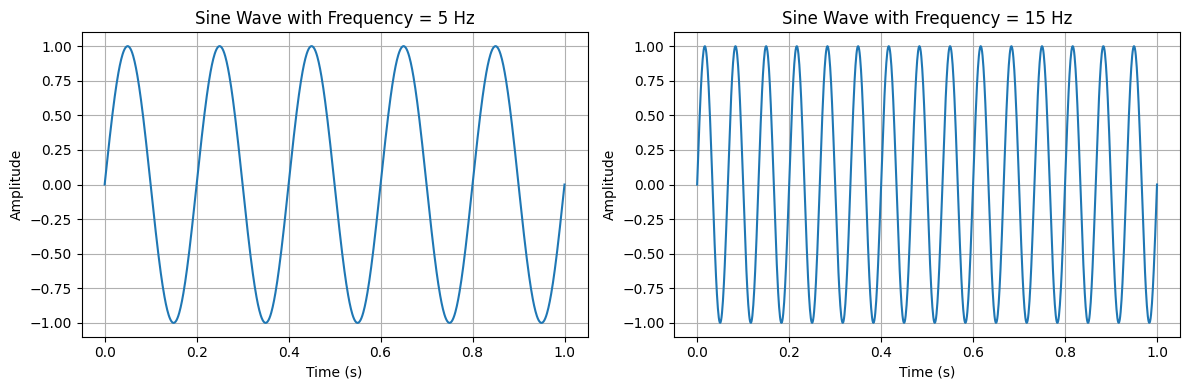

In [7]:
# Generate two sine waves with different frequencies
freq1 = 5
freq2 = 15
y1 = np.sin(2 * np.pi * freq1 * t)
y2 = np.sin(2 * np.pi * freq2 * t)

# Plot the signals
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, y1)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sine Wave with Frequency = 5 Hz")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, y2)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sine Wave with Frequency = 15 Hz")
plt.grid(True)
plt.tight_layout()
plt.show()


#Phase
Phase is the relative position of a waveform in time, typically expressed in degrees or radians. The phase difference between two signals can provide insights into their synchronization or time delay.

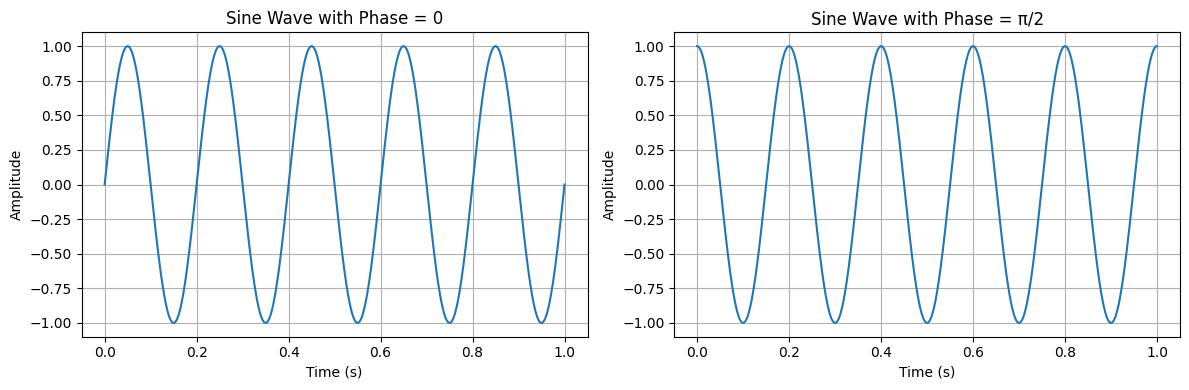

In [8]:
# Generate two sine waves with different phases
phase1 = 0
phase2 = np.pi / 2
y1 = np.sin(2 * np.pi * freq * t + phase1)
y2 = np.sin(2 * np.pi * freq * t + phase2)

# Plot the signals
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, y1)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sine Wave with Phase = 0")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, y2)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sine Wave with Phase = π/2")
plt.grid(True)
plt.tight_layout()
plt.show()


# Summary
We covered the characteristics of signals. This included amplitude, frequency, phase and time domain analysis methods. To help you visualise and process signals using these concepts, we have also provided Python code examples. These techniques form the basis of advanced signal processing and analysis tasks. You can build upon in this and following chapters these fundamental concepts to explore more complex methods and their applications in neurotechnology. Now we will expand the time-domain analysis on a simulated EEG data of 8 channels. 

## 3.3 Signal Analysis Techniques 


#Time-Domain Analytical Methods
Time-domain methods analyze the signal in its original form, focusing on amplitude and time characteristics. Common techniques include signal averaging, time-domain filters, autocorrelation, and cross-correlation.



# Simulating 8-channel EEG
First, let's simulate 8-channel EEG data with different frequency components and added noise.


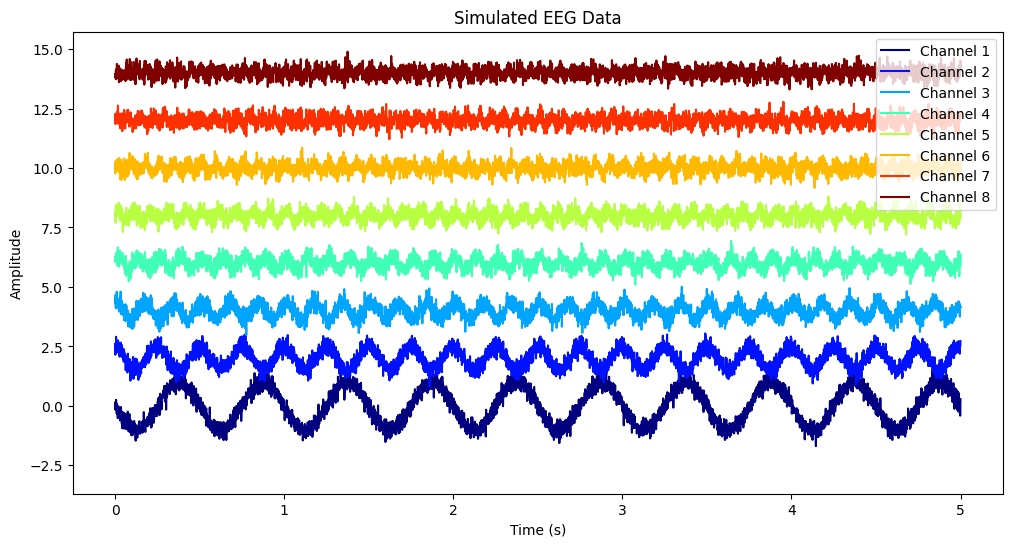

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000  # Sampling frequency (Hz)
duration = 5  # Duration of the signal (seconds)
n_channels = 8  # Number of channels
time = np.linspace(0, duration, duration * fs)

# Generate EEG data
eeg_data = []
for i in range(n_channels):
    freq = 2 + i * 2  # Frequency (Hz)
    amp = 1 / (i + 1)  # Amplitude
    phase = np.pi / (i + 1)  # Phase
    signal = amp * np.sin(2 * np.pi * freq * time + phase)
    noise = np.random.normal(0, 0.2, len(time))  # Add noise
    eeg_data.append(signal + noise)

eeg_data = np.array(eeg_data)

# Plot the EEG data
plt.figure(figsize=(12, 6))
colors = plt.cm.jet(np.linspace(0, 1, n_channels))

for i, data in enumerate(eeg_data):
    plt.plot(time, data + i * 2, color=colors[i], label=f"Channel {i + 1}")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Simulated EEG Data")
plt.legend(loc='upper right')

# Set y-axis limits
y_min = np.min(eeg_data) - 2
y_max = np.max(eeg_data) + 2 * (n_channels - 1)
plt.ylim([y_min, y_max])

plt.show()


Now, let's analyze the simulated EEG data using the time-domain techniques mentioned above.




# Mean
The mean of a signal represents its average value. It can be calculated as the sum of all the signal values divided by the number of values.

#Signal Averaging
Signal averaging is a technique used to reduce random noise in a signal by averaging multiple instances of the signal or segments of the signal. This is especially useful when the signal of interest is repetitive and the noise is uncorrelated.

# Signal Averaging across all the EEG Channels 
Signal averaging can be used to reduce noise in the data by averaging multiple epochs of the same signal. In our case, we will average the 8-channel EEG data.

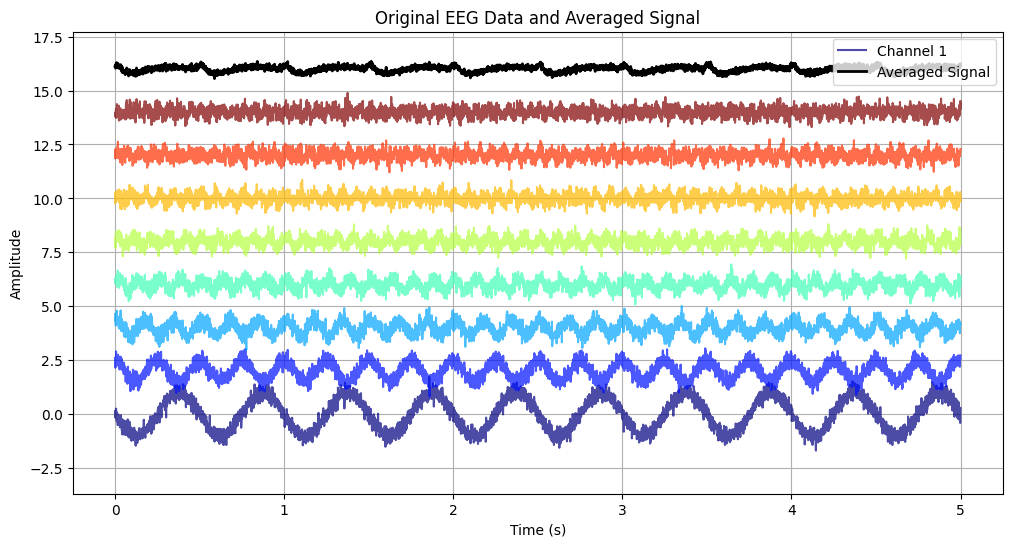

In [12]:
# Calculate the average of the 8-channel EEG data
average_eeg = np.mean(eeg_data, axis=0)

# Plot the original EEG data and the averaged signal
plt.figure(figsize=(12, 6))

# Plot the original EEG data
for i, data in enumerate(eeg_data):
    plt.plot(time, data + i * 2, color=colors[i], alpha=0.7, label=f"Channel {i + 1}" if i == 0 else None)

# Plot the averaged signal
plt.plot(time, average_eeg + 2 * n_channels, color='black', linewidth=2, label="Averaged Signal")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Original EEG Data and Averaged Signal")
plt.legend(loc='upper right')

# Set y-axis limits
y_min = np.min(eeg_data) - 2
y_max = np.max(eeg_data) + 2 * n_channels
plt.ylim([y_min, y_max])

plt.grid(True)
plt.show()


# Signal Averaging of all the EEG Channels Separately

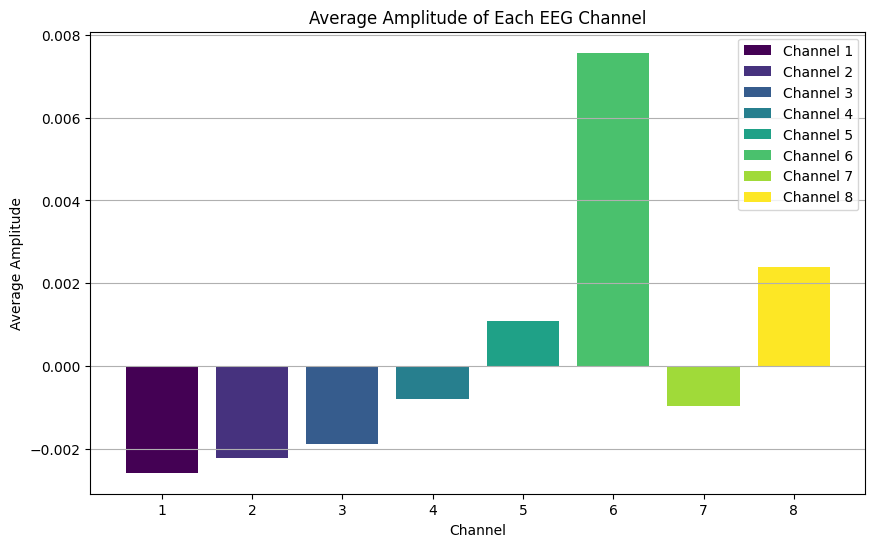

In [13]:
# Calculate the average of the 8-channel EEG data
average_eeg = np.mean(eeg_data, axis=1)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the averages of all channels
colors = plt.cm.viridis(np.linspace(0, 1, n_channels))
for i, avg in enumerate(average_eeg):
    ax.bar(i + 1, avg, color=colors[i], label=f"Channel {i + 1}")

# Customize the plot
ax.set_xlabel("Channel")
ax.set_ylabel("Average Amplitude")
ax.set_title("Average Amplitude of Each EEG Channel")
ax.set_xticks(range(1, n_channels + 1))
ax.legend(loc='upper right')
ax.grid(axis='y')

plt.show()


#Time-Domain Filters: Moving Average and Gaussian Filters
Time-domain filters are used to smooth or remove specific frequency components from a signal. Two common filters are the moving average filter and the Gaussian filter. Here, we will apply a moving average filter and a Gaussian filter to the first channel of the EEG data.

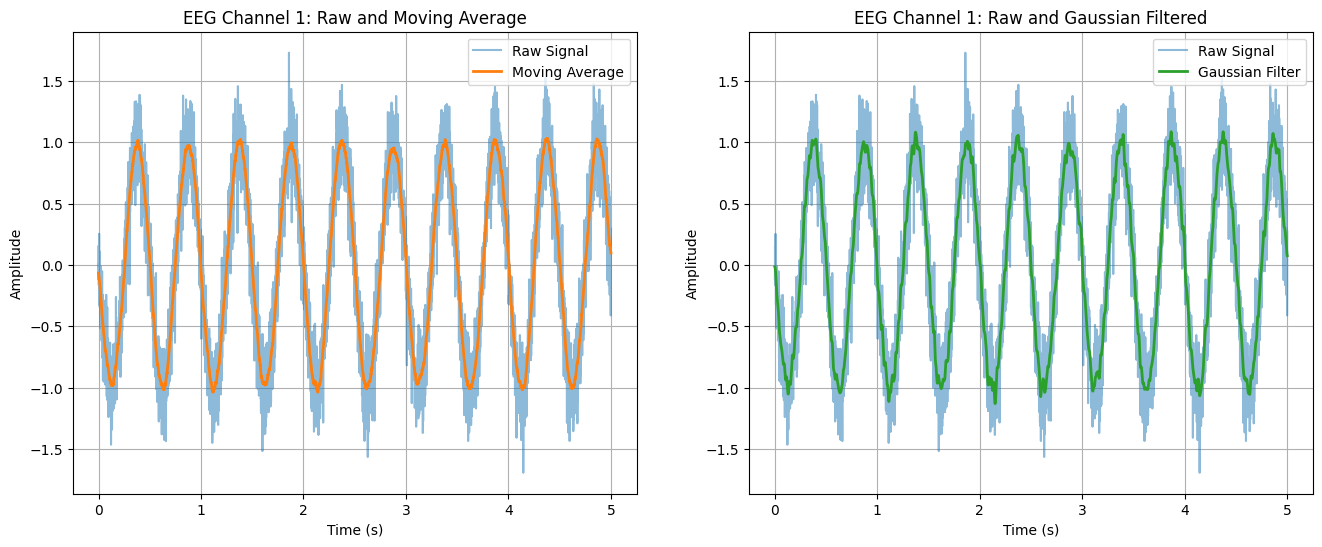

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Moving average function
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), mode="same") / window_size

# Parameters
window_size = 50  # Window size for the moving average
sigma = 5  # Standard deviation for the Gaussian filter

# Get the first channel of the EEG data
eeg_channel_1 = eeg_data[0]

# Apply moving average
moving_avg = moving_average(eeg_channel_1, window_size)

# Apply Gaussian filter
gaussian_filtered = gaussian_filter1d(eeg_channel_1, sigma)

# Plot the raw signal, moving average, and Gaussian filtered signal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the moving average
ax1.plot(time, eeg_channel_1, label="Raw Signal", alpha=0.5, color="C0")
ax1.plot(time, moving_avg, label="Moving Average", linewidth=2, color="C1")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Amplitude")
ax1.set_title("EEG Channel 1: Raw and Moving Average")
ax1.legend(loc='upper right')
ax1.grid(True)

# Plot the Gaussian filtered signal
ax2.plot(time, eeg_channel_1, label="Raw Signal", alpha=0.5, color="C0")
ax2.plot(time, gaussian_filtered, label="Gaussian Filter", linewidth=2, color="C2")
ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Amplitude")
ax2.set_title("EEG Channel 1: Raw and Gaussian Filtered")
ax2.legend(loc='upper right')
ax2.grid(True)

plt.show()


## EXERCISE
Please change the EEG channel and observe the impact of the moving average and gaussian filtered signal. 

Hint: eeg_channel_x = eeg_data[x]

# Variance
Variance is a measure of the spread or dispersion of a signal. It is calculated as the average of the squared differences from the mean.

# Variance for each time point in the signal (EEG Ch 1) 

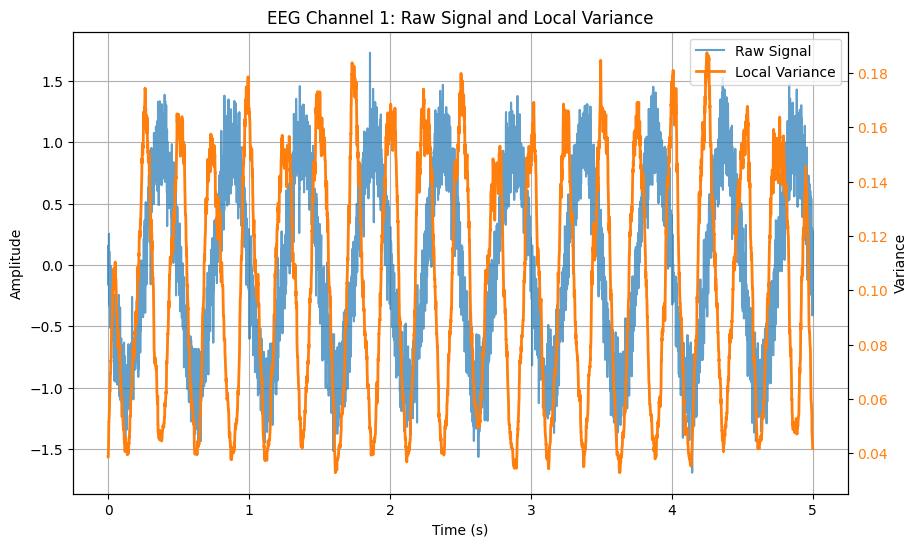

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate the local variance using a moving window
def local_variance(signal, window_size):
    half_window = window_size // 2
    padded_signal = np.pad(signal, (half_window, half_window), mode='edge')
    variance_array = np.zeros(len(signal))
    for i in range(len(signal)):
        window = padded_signal[i:i + window_size]
        variance_array[i] = np.var(window)
    return variance_array

window_size = 100  # Choose an appropriate window size
local_var = local_variance(eeg_channel_1, window_size)

# Plot the raw signal and local variance
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(time, eeg_channel_1, label="Raw Signal", alpha=0.7, color="C0")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Amplitude")
ax1.set_title("EEG Channel 1: Raw Signal and Local Variance")
ax1.grid(True)

ax2.plot(time, local_var, label="Local Variance", linewidth=2, color="C1")
ax2.set_ylabel("Variance")
ax2.tick_params(axis="y", labelcolor="C1")

# Add a legend for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show()


EXERCISE

Please change the EEG channel in the above code and observe the Variance.


# Autocorrelation
Autocorrelation is a measure of how a signal correlates with a delayed copy of itself. It is useful for detecting repeating patterns or periodicity within signals.

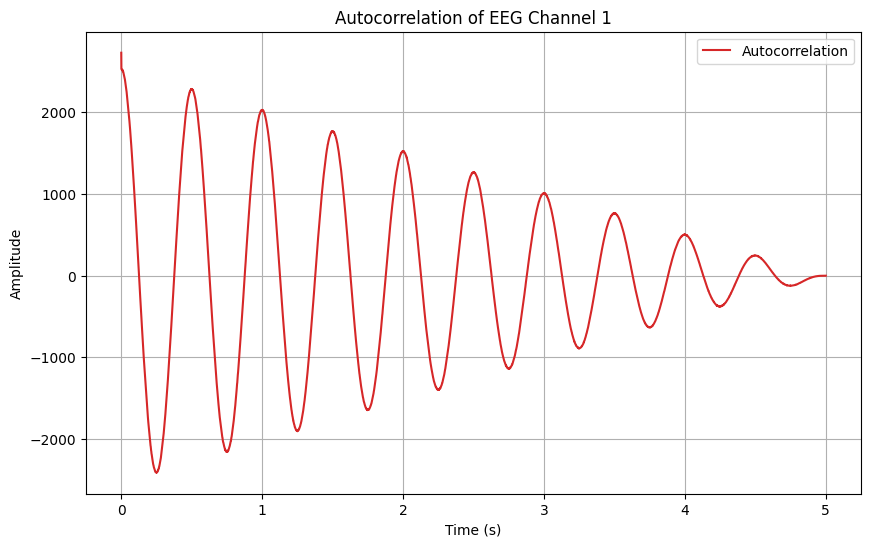

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Autocorrelation function
def autocorr(x):
    result = correlate(x, x, mode='full')
    return result[result.size // 2:]

# Get the first channel of the EEG data
eeg_channel_1 = eeg_data[0]

# Calculate the autocorrelation
autocorr_signal = autocorr(eeg_channel_1)

# Create time vector for the autocorrelation signal
time_autocorr = np.linspace(0, duration, autocorr_signal.size)

# Plot the autocorrelation signal
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(time_autocorr, autocorr_signal, label="Autocorrelation", color="C3")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
ax.set_title("Autocorrelation of EEG Channel 1")
ax.legend(loc='upper right')
ax.grid(True)

plt.show()


EXERCISE

Please change the EEG channel in the above code and observe the autocorrelation in different EEG channel signals.


#Cross-Correlation

Cross-correlation is a technique used to determine the similarity between two signals by comparing one signal with a time-shifted version of the other signal. It is useful in finding the time lag between two signals, measuring the similarity between them, and identifying features that are common in both signals.


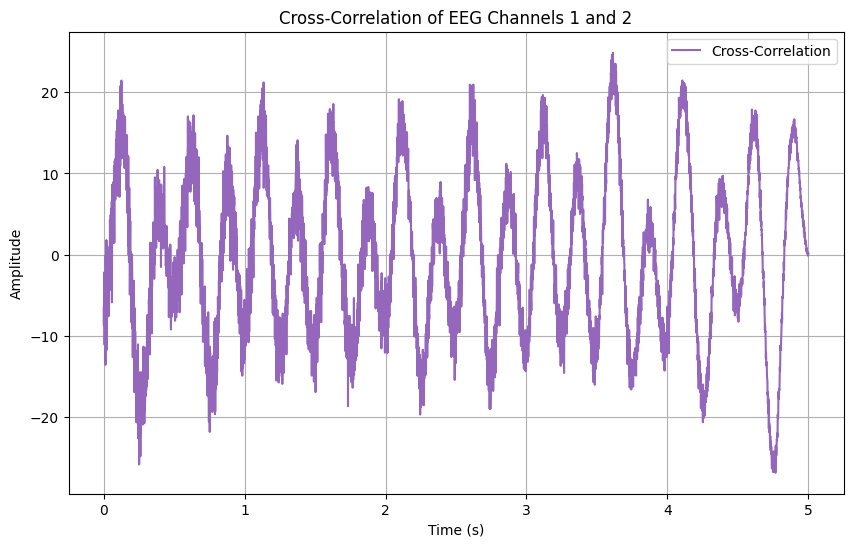

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Cross-correlation function
def cross_corr(x, y):
    result = correlate(x, y, mode='full')
    return result[result.size // 2:]

# Get the first and second channels of the EEG data
eeg_channel_1 = eeg_data[0]
eeg_channel_2 = eeg_data[1]

# Calculate the cross-correlation
cross_corr_signal = cross_corr(eeg_channel_1, eeg_channel_2)

# Create time vector for the cross-correlation signal
time_cross_corr = np.linspace(0, duration, cross_corr_signal.size)

# Plot the cross-correlation signal
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(time_cross_corr, cross_corr_signal, label="Cross-Correlation", color="C4")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
ax.set_title("Cross-Correlation of EEG Channels 1 and 2")
ax.legend(loc='upper right')
ax.grid(True)

plt.show()


EXERCISE

Please change the two EEG channels in the above code and observe the cross-correlation between different EEG channel signals.


#Summary: 
In this section, we have provided a breif explanation of common time-domain signal analysis techniques, such as signal averaging, time-domain filters (moving average and Gaussian filters), autocorrelation, and cross-correlation. We have also included Python code snippets demonstrating these methods using synthetic data. These techniques form the foundation of advanced signal processing and analysis tasks. You can build upon these fundamental concepts to explore more complex methods and their applications in neurotechnology.



#Frequency-Domain Analysis

Frequency-domain analysis involves transforming the time-domain signal into its frequency components, allowing us to study the signal's frequency and phase characteristics. This analysis is crucial for understanding the spectral properties of signals and identifying dominant frequency components. In this section, we will discuss some common frequency-domain techniques, including Fourier Transform, Fast Fourier Transform (FFT), Power Spectral Density (PSD), and Spectrogram.

#Fourier Transform
The Fourier Transform is a mathematical technique that transforms a time-domain signal into its frequency components. It provides information about the signal's frequency and phase characteristics, allowing us to identify dominant frequencies and analyze periodic components.

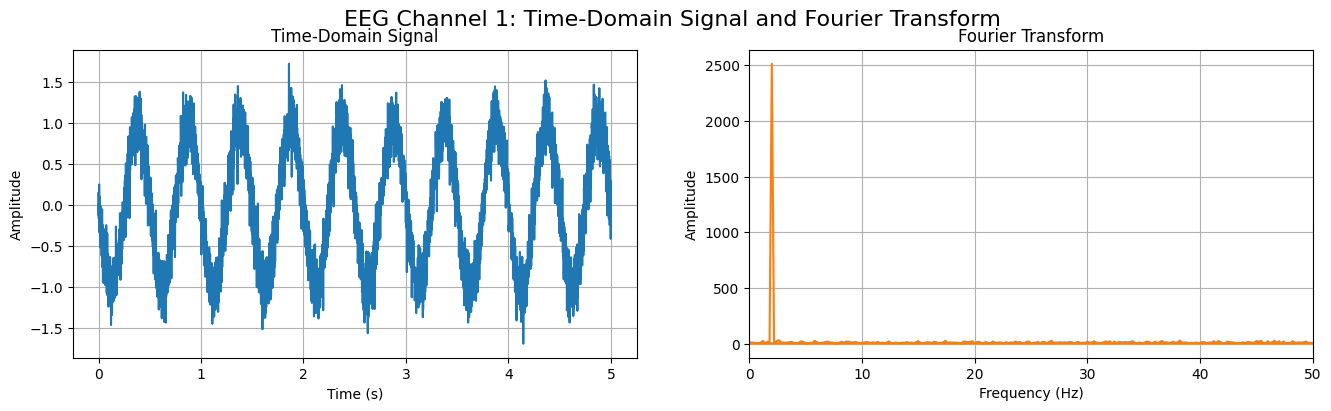

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the Fourier Transform of the first EEG channel
fft_eeg_channel_1 = np.fft.fft(eeg_data[0])
frequencies = np.fft.fftfreq(time.size, 1/fs)

# Plot the time-domain signal and the Fourier Transform
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

# Time-domain signal
ax[0].plot(time, eeg_data[0], label="Channel 1", color="C0")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Amplitude")
ax[0].set_title("Time-Domain Signal")
ax[0].grid(True)

# Fourier Transform
ax[1].plot(frequencies, np.abs(fft_eeg_channel_1), label="Channel 1", color="C1")
ax[1].set_xlim([0, 50])  # Limit the x-axis to show frequencies up to 50 Hz
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_ylabel("Amplitude")
ax[1].set_title("Fourier Transform")
ax[1].grid(True)

fig.suptitle("EEG Channel 1: Time-Domain Signal and Fourier Transform", fontsize=16)
plt.show()


#Fast Fourier Transform (FFT)
The Fast Fourier Transform (FFT) is an efficient algorithm for computing the Discrete Fourier Transform (DFT) of a sequence. It reduces the computational complexity of the DFT, making it suitable for real-time signal processing and analysis.

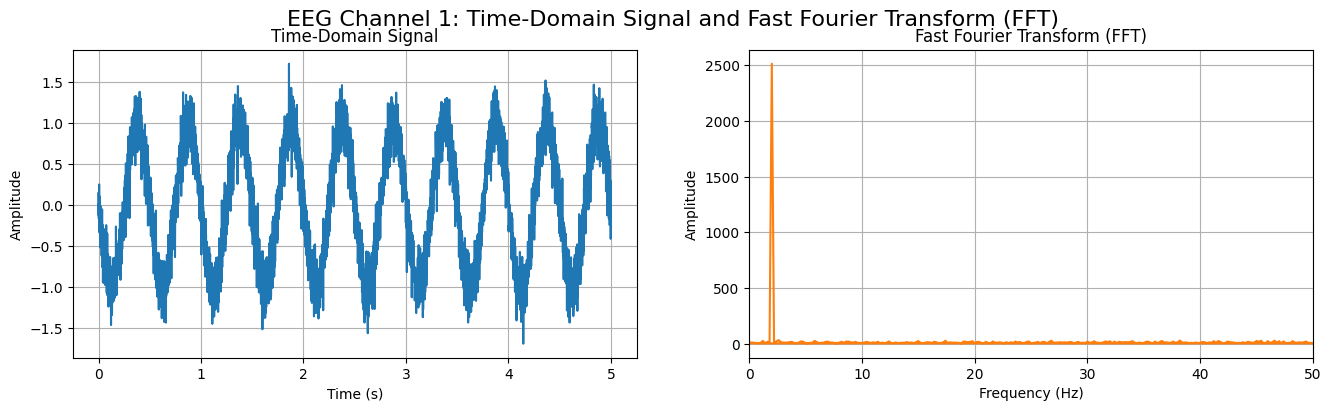

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the Fast Fourier Transform (FFT) of the first EEG channel
fft_eeg_channel_1 = np.fft.fft(eeg_data[0])
frequencies = np.fft.fftfreq(time.size, 1/fs)

# Plot the time-domain signal and the Fast Fourier Transform (FFT)
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

# Time-domain signal
ax[0].plot(time, eeg_data[0], label="Channel 1", color="C0")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Amplitude")
ax[0].set_title("Time-Domain Signal")
ax[0].grid(True)

# Fast Fourier Transform (FFT)
ax[1].plot(frequencies, np.abs(fft_eeg_channel_1), label="Channel 1", color="C1")
ax[1].set_xlim([0, 50])  # Limit the x-axis to show frequencies up to 50 Hz
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_ylabel("Amplitude")
ax[1].set_title("Fast Fourier Transform (FFT)")
ax[1].grid(True)

fig.suptitle("EEG Channel 1: Time-Domain Signal and Fast Fourier Transform (FFT)", fontsize=16)
plt.show()


#Power Spectral Density (PSD)
The Power Spectral Density (PSD) is a function that describes how the power of a signal is distributed across different frequencies. It is useful for identifying dominant frequency components and characterizing the spectral content of signals.

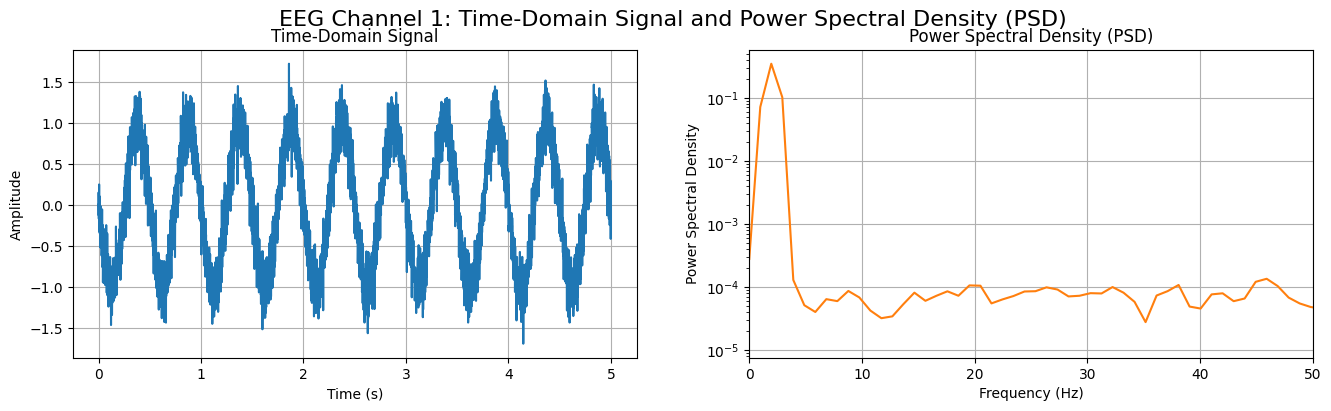

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Calculate the Power Spectral Density (PSD) using Welch's method for EEG channel 1
frequencies, psd = welch(eeg_data[0], fs, nperseg=1024)

# Plot the time-domain signal and the Power Spectral Density (PSD)
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

# Time-domain signal
ax[0].plot(time, eeg_data[0], label="Channel 1", color="C0")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Amplitude")
ax[0].set_title("Time-Domain Signal")
ax[0].grid(True)

# Power Spectral Density (PSD)
ax[1].semilogy(frequencies, psd, label="Channel 1", color="C1")
ax[1].set_xlim([0, 50])  # Limit the x-axis to show frequencies up to 50 Hz
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_ylabel("Power Spectral Density")
ax[1].set_title("Power Spectral Density (PSD)")
ax[1].grid(True)

fig.suptitle("EEG Channel 1: Time-Domain Signal and Power Spectral Density (PSD)", fontsize=16)
plt.show()


#Spectrogram

A spectrogram is a visual representation of the frequency content of a signal as it evolves over time. It is obtained by dividing the signal into short segments, computing the power spectral density for each segment, and then displaying the results as a two-dimensional plot with time on the x-axis, frequency on the y-axis, and power on the z-axis (usually represented as color intensity).


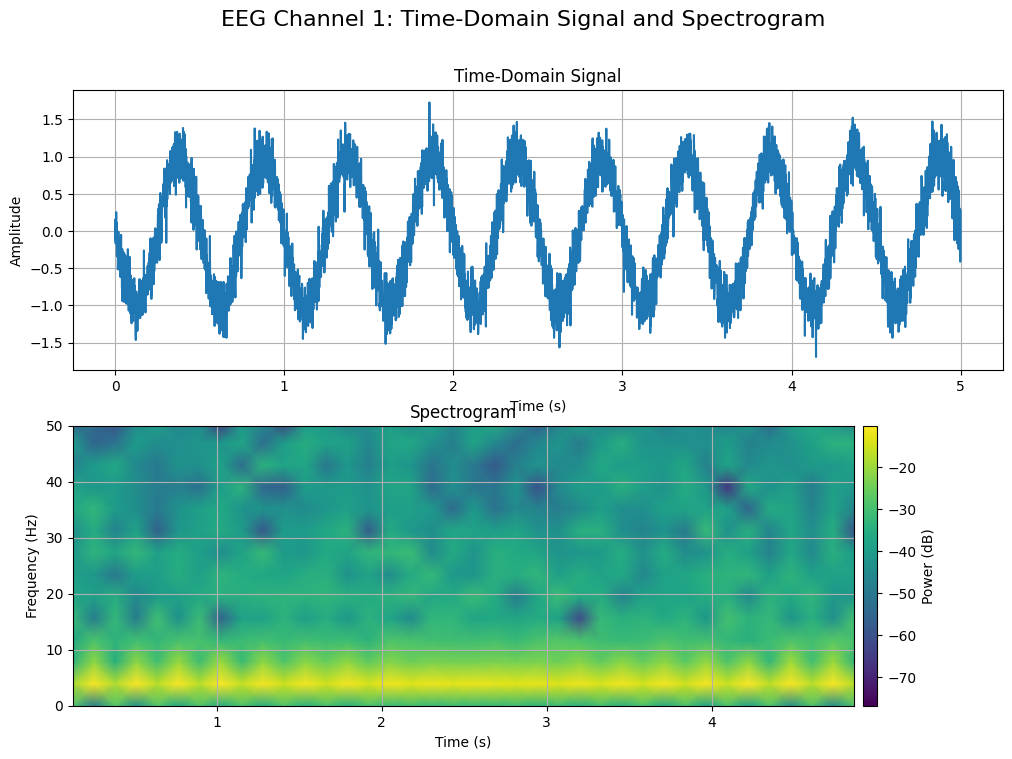

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Calculate the spectrogram for EEG channel 1
frequencies, time_segments, spec = spectrogram(eeg_data[0], fs, nperseg=256, noverlap=128)

# Plot the time-domain signal and the spectrogram
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Time-domain signal
ax[0].plot(time, eeg_data[0], label="Channel 1", color="C0")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Amplitude")
ax[0].set_title("Time-Domain Signal")
ax[0].grid(True)

# Spectrogram
img = ax[1].pcolormesh(time_segments, frequencies, 10 * np.log10(spec), shading='gouraud')
ax[1].set_ylim([0, 50])  # Limit the y-axis to show frequencies up to 50 Hz
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Frequency (Hz)")
ax[1].set_title("Spectrogram")
ax[1].grid(True)

# Add a colorbar to the spectrogram
cbar = fig.colorbar(img, ax=ax[1], orientation='vertical', pad=0.01)
cbar.set_label("Power (dB)")

fig.suptitle("EEG Channel 1: Time-Domain Signal and Spectrogram", fontsize=16)
plt.show()


# Wavelet Transform: 
The Wavelet Transform is a time-frequency analysis technique that decomposes a signal into wavelets, which are localized in both time and frequency. It provides a flexible and adaptive way to analyze non-stationary signals, making it suitable for applications where the signal's frequency content changes over time.

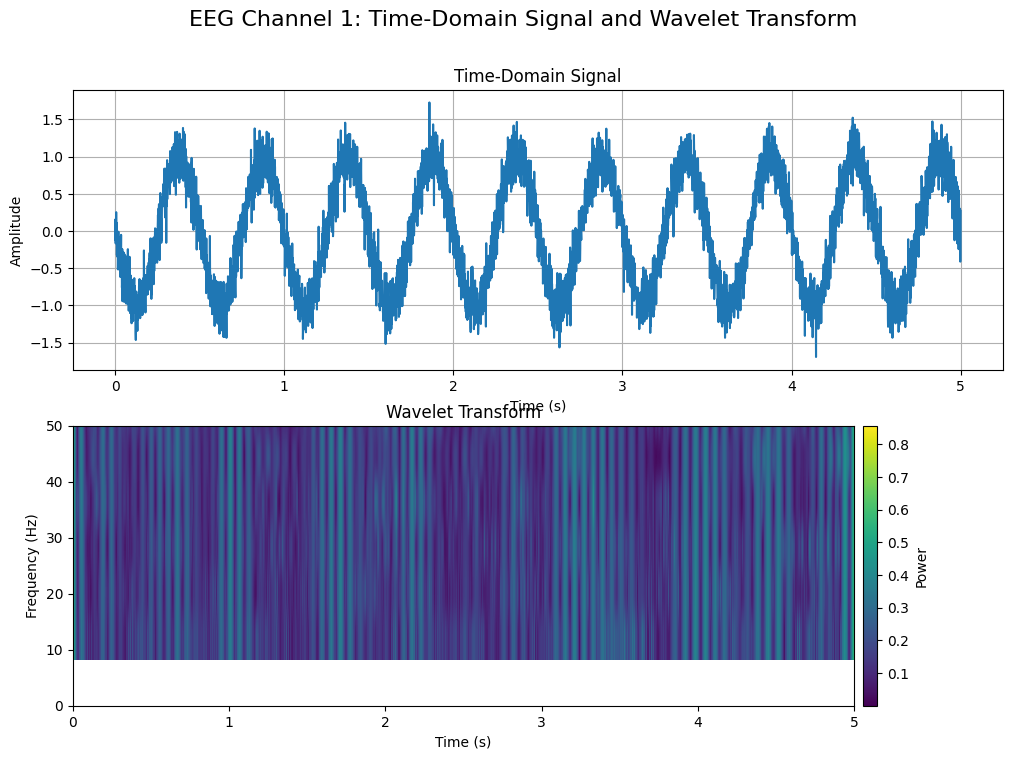

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Wavelet transform parameters
wavelet = "morl"
scales = np.arange(1, 101)

# Calculate the wavelet transform for EEG channel 1
coefficients, frequencies = pywt.cwt(eeg_data[0], scales, wavelet, 1/fs)

# Plot the time-domain signal and the wavelet transform
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Time-domain signal
ax[0].plot(time, eeg_data[0], label="Channel 1", color="C0")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Amplitude")
ax[0].set_title("Time-Domain Signal")
ax[0].grid(True)

# Wavelet transform
img = ax[1].imshow(np.abs(coefficients), extent=[0, duration, frequencies[-1], frequencies[0]], aspect='auto', cmap='viridis')
ax[1].set_ylim([0, 50])  # Limit the y-axis to show frequencies up to 50 Hz
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Frequency (Hz)")
ax[1].set_title("Wavelet Transform")

# Add a colorbar to the wavelet transform
cbar = fig.colorbar(img, ax=ax[1], orientation='vertical', pad=0.01)
cbar.set_label("Power")

fig.suptitle("EEG Channel 1: Time-Domain Signal and Wavelet Transform", fontsize=16)
plt.show()


# Coherence: 
Coherence is a measure of the linear correlation between two signals as a function of frequency. It ranges from 0 to 1, with 0 indicating no correlation and 1 indicating perfect correlation. Coherence can be used to assess the frequency-dependent relationship between two signals, such as the synchrony between brain regions in EEG data.

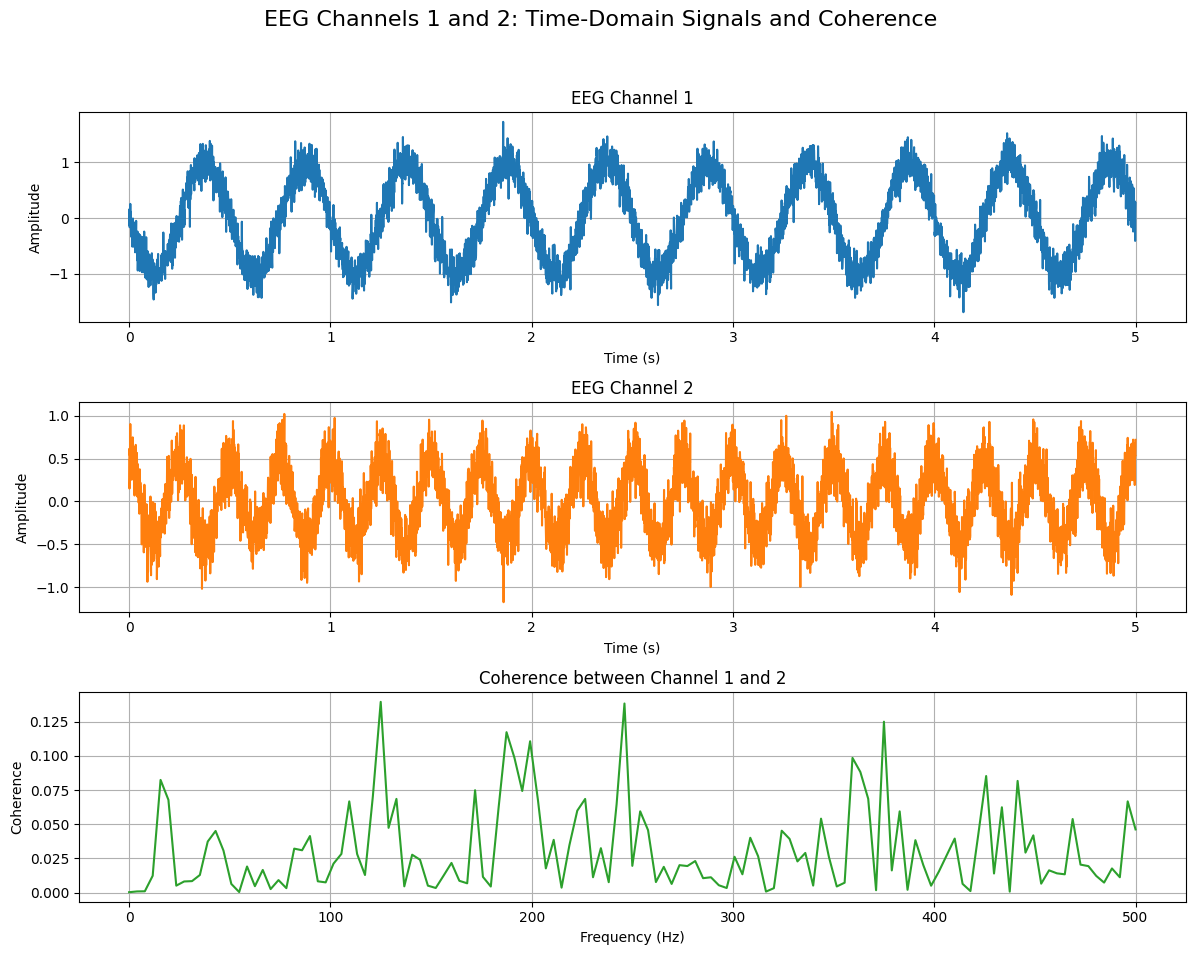

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import coherence

# Coherence parameters
nperseg = 256
noverlap = 128

# Calculate the coherence between EEG channels 1 and 2
frequencies, coh = coherence(eeg_data[0], eeg_data[1], fs=fs, nperseg=nperseg, noverlap=noverlap)

# Plot the time-domain signals and the coherence
fig, ax = plt.subplots(3, 1, figsize=(12, 10))

# Time-domain signals
ax[0].plot(time, eeg_data[0], label="Channel 1", color="C0")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Amplitude")
ax[0].set_title("EEG Channel 1")
ax[0].grid(True)

ax[1].plot(time, eeg_data[1], label="Channel 2", color="C1")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Amplitude")
ax[1].set_title("EEG Channel 2")
ax[1].grid(True)

# Coherence
ax[2].plot(frequencies, coh, label="Coherence", color="C2")
ax[2].set_xlabel("Frequency (Hz)")
ax[2].set_ylabel("Coherence")
ax[2].set_title("Coherence between Channel 1 and 2")
ax[2].grid(True)

fig.suptitle("EEG Channels 1 and 2: Time-Domain Signals and Coherence", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Cross-spectrum: 
The cross-spectrum is a frequency-domain representation of the cross-correlation between two signals. It is a complex-valued function that provides information about the amplitude and phase relationship between the signals at different frequencies. The cross-spectrum can be used to identify frequency components that are shared between the signals and the phase differences between them.

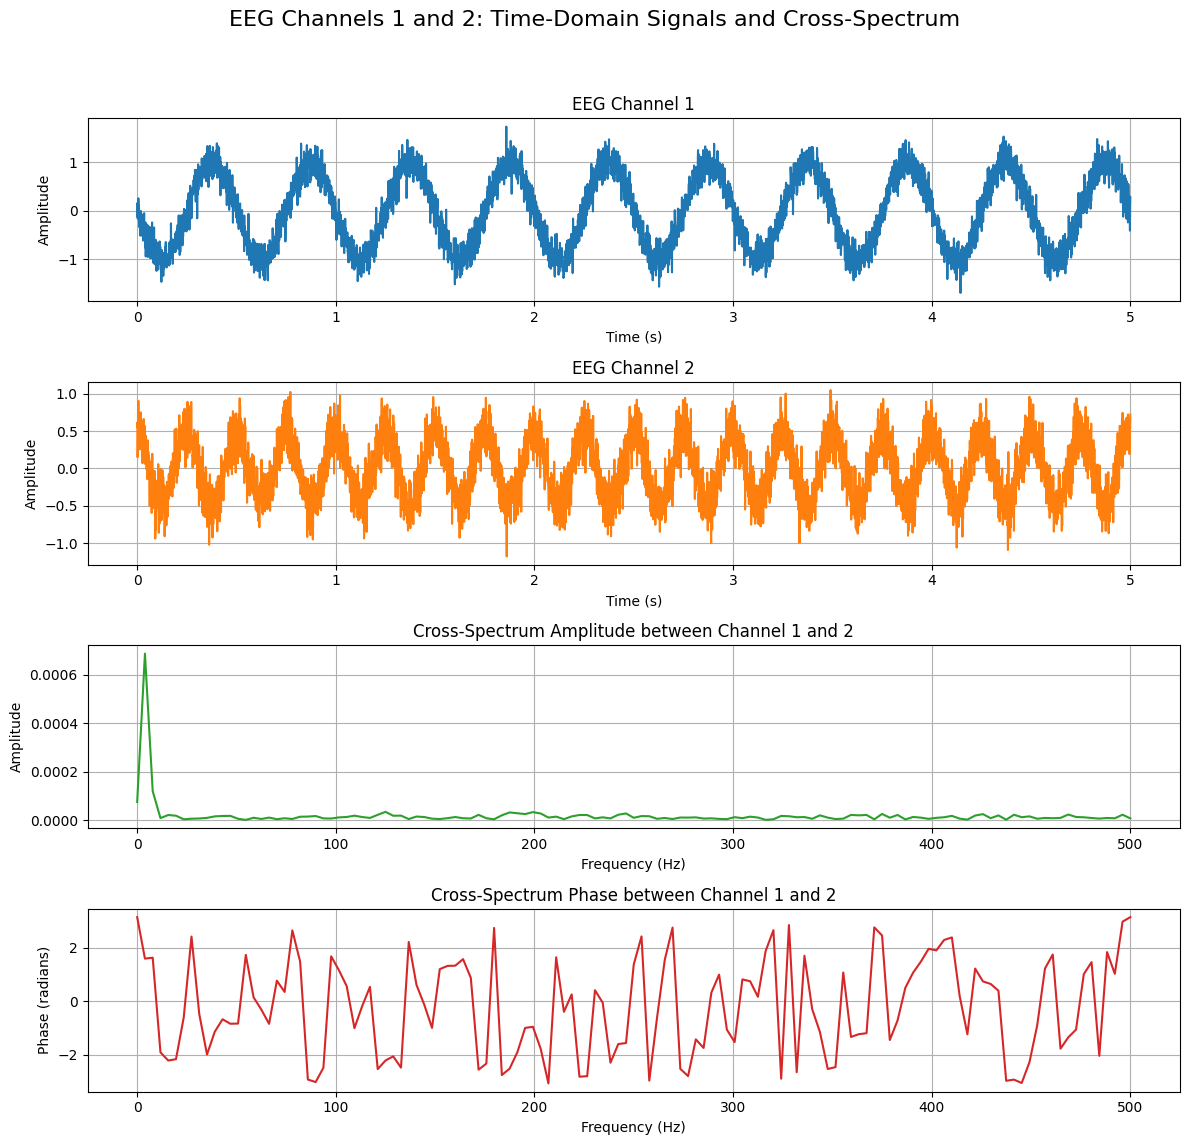

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import csd

# Cross-spectrum parameters
nperseg = 256
noverlap = 128

# Calculate the cross-spectrum between EEG channels 1 and 2
frequencies, cross_spectrum = csd(eeg_data[0], eeg_data[1], fs=fs, nperseg=nperseg, noverlap=noverlap)

# Calculate amplitude and phase information
amplitude = np.abs(cross_spectrum)
phase = np.angle(cross_spectrum)

# Plot the time-domain signals and the cross-spectrum amplitude and phase
fig, ax = plt.subplots(4, 1, figsize=(12, 12))

# Time-domain signals
ax[0].plot(time, eeg_data[0], label="Channel 1", color="C0")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Amplitude")
ax[0].set_title("EEG Channel 1")
ax[0].grid(True)

ax[1].plot(time, eeg_data[1], label="Channel 2", color="C1")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Amplitude")
ax[1].set_title("EEG Channel 2")
ax[1].grid(True)

# Cross-spectrum amplitude
ax[2].plot(frequencies, amplitude, label="Amplitude", color="C2")
ax[2].set_xlabel("Frequency (Hz)")
ax[2].set_ylabel("Amplitude")
ax[2].set_title("Cross-Spectrum Amplitude between Channel 1 and 2")
ax[2].grid(True)

# Cross-spectrum phase
ax[3].plot(frequencies, phase, label="Phase", color="C3")
ax[3].set_xlabel("Frequency (Hz)")
ax[3].set_ylabel("Phase (radians)")
ax[3].set_title("Cross-Spectrum Phase between Channel 1 and 2")
ax[3].grid(True)

fig.suptitle("EEG Channels 1 and 2: Time-Domain Signals and Cross-Spectrum", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Summary: 
In this section, we have provided a detailed explanation of common frequency-domain signal analysis techniques. We have also included Python code snippets demonstrating these methods using synthetic data. These techniques form the foundation of advanced signal processing and analysis tasks. 


#Time-frequency analysis 
Time-frequency analysis techniques are essential for studying signals that vary in both time and frequency domains. In this section, we will discuss some common time-frequency analysis techniques, including Short-Time Fourier Transform (STFT), Continuous Wavelet Transform (CWT), and Discrete Wavelet Transform (DWT).

#Short-Time Fourier Transform (STFT)
The Short-Time Fourier Transform (STFT) is a time-frequency analysis technique that involves applying the Fourier Transform to small, overlapping segments of a signal. By applying the Fourier Transform to each segment, we can analyze the frequency content of the signal over time.

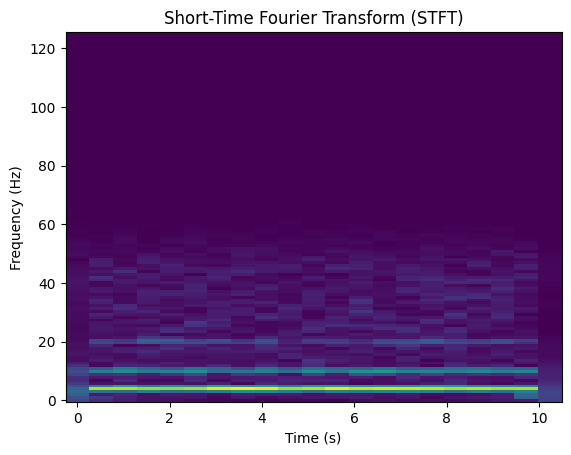

In [ ]:
from scipy.signal import stft

# Compute the Short-Time Fourier Transform
f_stft, t_stft, Zxx = stft(eeg_data_filtered[0], fs=fs, nperseg=256, noverlap=128)

# Plot the Short-Time Fourier Transform
plt.pcolormesh(t_stft, f_stft, np.abs(Zxx), shading='auto')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Short-Time Fourier Transform (STFT)')
plt.show()


#Continuous Wavelet Transform (CWT)
The Continuous Wavelet Transform (CWT) is a time-frequency analysis technique that involves convolving a signal with a wavelet function that varies in both time and frequency. The CWT provides a high resolution time-frequency analysis of a signal and is useful for analyzing non-stationary signals.

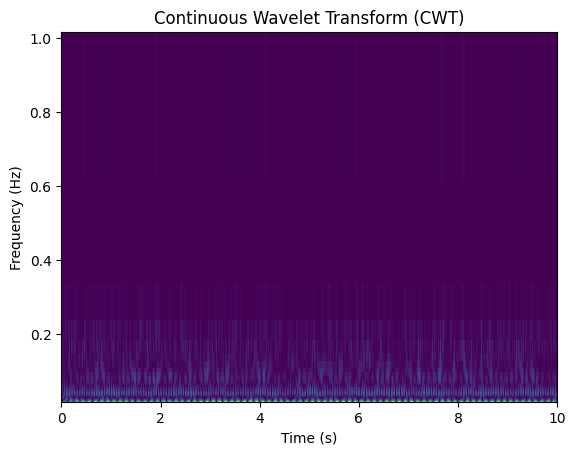

In [ ]:
import pywt

# Compute the Continuous Wavelet Transform using the Morlet wavelet
wavelet = pywt.ContinuousWavelet('morl')
cwtmatr, freqs = pywt.cwt(eeg_data_filtered[0], np.arange(1, 50), wavelet=wavelet)

# Plot the Continuous Wavelet Transform
plt.pcolormesh(t, freqs, np.abs(cwtmatr), shading='auto')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Continuous Wavelet Transform (CWT)')
plt.show()


#Discrete Wavelet Transform (DWT)
The Discrete Wavelet Transform (DWT) is a time-frequency analysis technique that involves decomposing a signal into different frequency sub-bands using a series of low-pass and high-pass filters. The DWT is useful for analyzing signals with varying frequency content and is often used for denoising and compression.

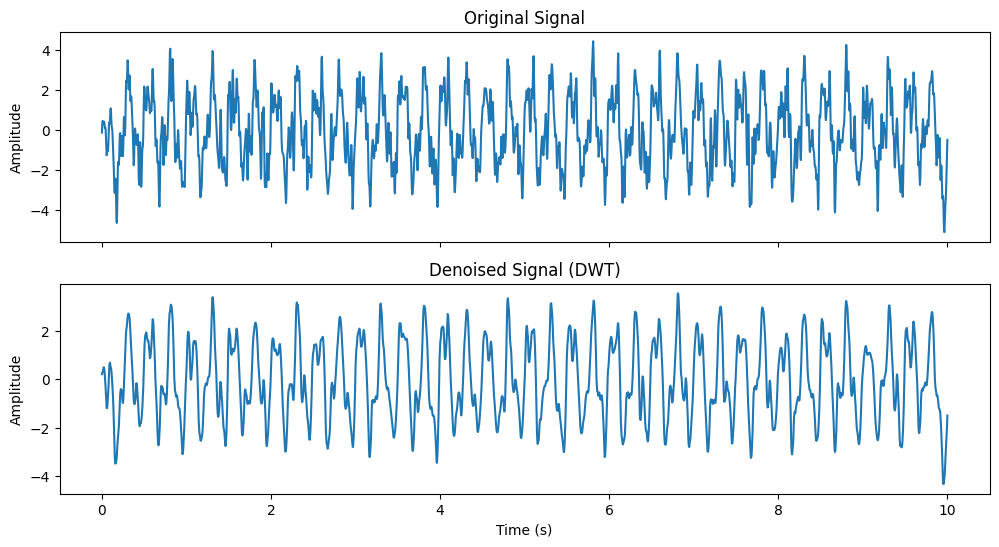

In [ ]:
# Compute the Discrete Wavelet Transform using the db4 wavelet
coeffs = pywt.wavedec(eeg_data_filtered[0], 'db4')

# Reconstruct the signal using only the first 3 frequency sub-bands
reconstructed = pywt.waverec(coeffs[:-3] + [None] * 3, 'db4')

# Remove the last two samples from the reconstructed signal to match the length of the original signal
reconstructed = reconstructed[:-2]

# Plot the original signal and the reconstructed signal
fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
axs[0].plot(t, eeg_data_filtered[0])
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Original Signal')

axs[1].plot(t, reconstructed)
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Denoised Signal (DWT)')
plt.show()


#EEG Data: Time-Frequency Analysis
Here are the Python code snippets (on an 8-channel EEG dataset) for performing 
* Short-Time Fourier Transform (STFT)
* Continuous Wavelet Transform (CWT), and 
* Discrete Wavelet Transform (DWT) 





#Short-Time Fourier Transform (STFT)

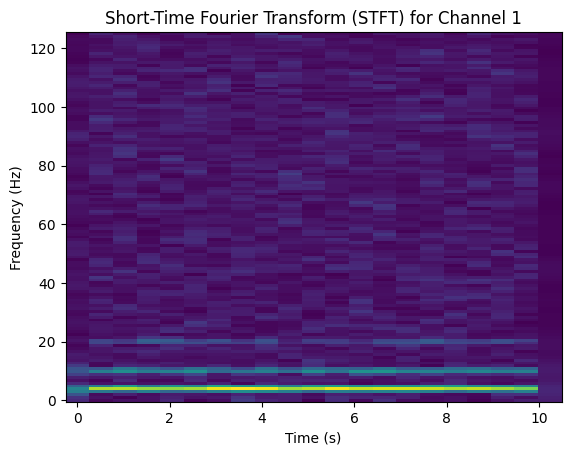

In [ ]:
from scipy.signal import stft

# Compute the Short-Time Fourier Transform for each channel
stft_data = []
for i in range(num_channels):
    _, _, Zxx = stft(eeg_data[i], fs=fs, nperseg=256, noverlap=128)
    stft_data.append(np.abs(Zxx))

# Plot the Short-Time Fourier Transform for channel 1
plt.pcolormesh(t_stft, f_stft, stft_data[0], shading='auto')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Short-Time Fourier Transform (STFT) for Channel 1')
plt.show()


#Continuous Wavelet Transform (CWT)

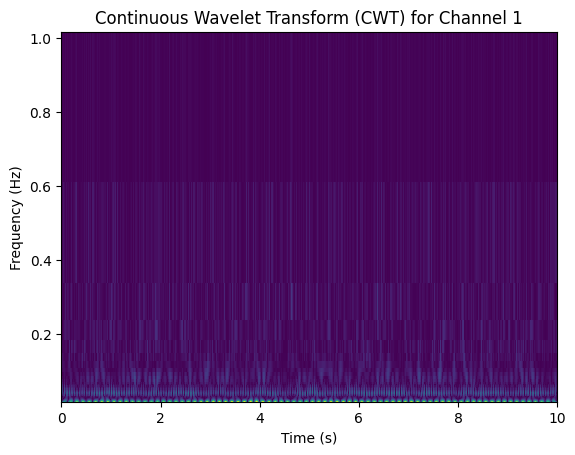

In [ ]:
import pywt

# Compute the Continuous Wavelet Transform using the Morlet wavelet for each channel
cwt_data = []
wavelet = pywt.ContinuousWavelet('morl')
for i in range(num_channels):
    cwtmatr, freqs = pywt.cwt(eeg_data[i], np.arange(1, 50), wavelet=wavelet)
    cwt_data.append(np.abs(cwtmatr))

# Plot the Continuous Wavelet Transform for channel 1
plt.pcolormesh(t, freqs, cwt_data[0], shading='auto')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Continuous Wavelet Transform (CWT) for Channel 1')
plt.show()


#Discrete Wavelet Transform (DWT)

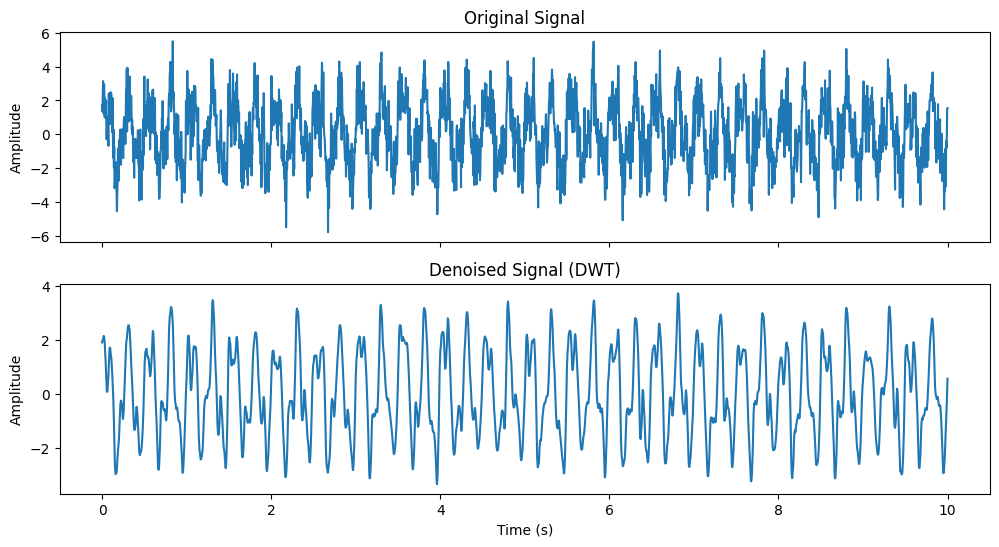

In [ ]:
# Compute the Discrete Wavelet Transform using the db4 wavelet for each channel
dwt_data = []
for i in range(num_channels):
    coeffs = pywt.wavedec(eeg_data[i], 'db4')
    reconstructed = pywt.waverec(coeffs[:-3] + [None] * 3, 'db4')
    reconstructed = reconstructed[:-2]
    dwt_data.append(reconstructed)

# Plot the original signal and the reconstructed signal for channel 1
fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
axs[0].plot(t, eeg_data[0])
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Original Signal')

axs[1].plot(t, dwt_data[0])
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Denoised Signal (DWT)')
plt.show()


I hope these code snippets are helpful!

#signal processing pipeline
signal processing pipeline consists of several steps, which include data acquisition, pre-processing, feature extraction, and classification.

#Data Acquisition
The first step in the signal processing pipeline is data acquisition, which involves the collection of raw signals from sensors or measurement devices. This step is critical because it determines the quality and reliability of the data. The choice of sensors or measurement devices depends on the specific application and the type of signal being measured. For example, in EEG studies, electrodes are placed on the scalp to record electrical activity from the brain.

#Pre-processing
After data acquisition, the next step is pre-processing, which involves preparing the raw signals for analysis. This step is critical because it removes noise and artifacts that can affect the accuracy of the analysis. Pre-processing techniques include filtering, artifact removal, and baseline correction.

#Filtering

Creating RawArray with float64 data, n_channels=9, n_times=2500
    Range : 0 ... 2499 =      0.000 ...     9.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 825 samples (3.300 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


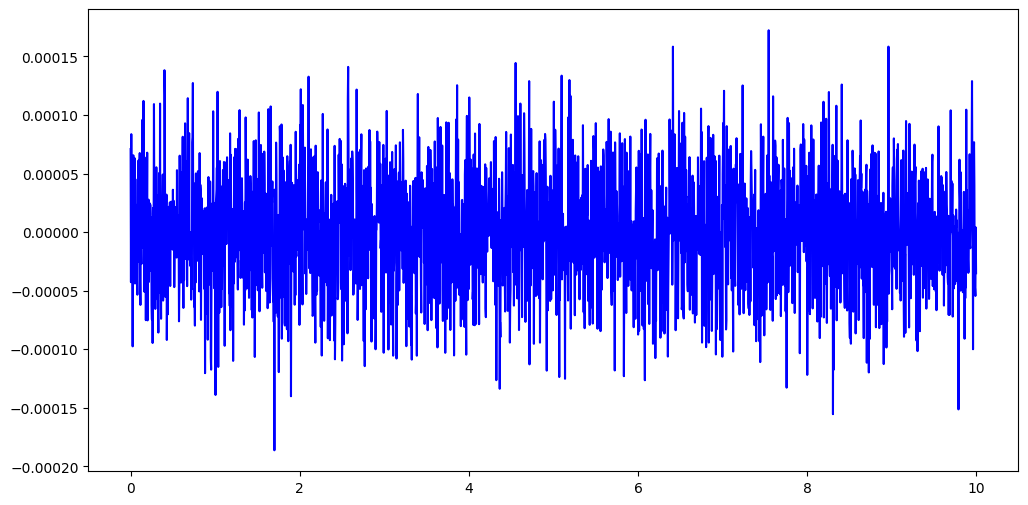

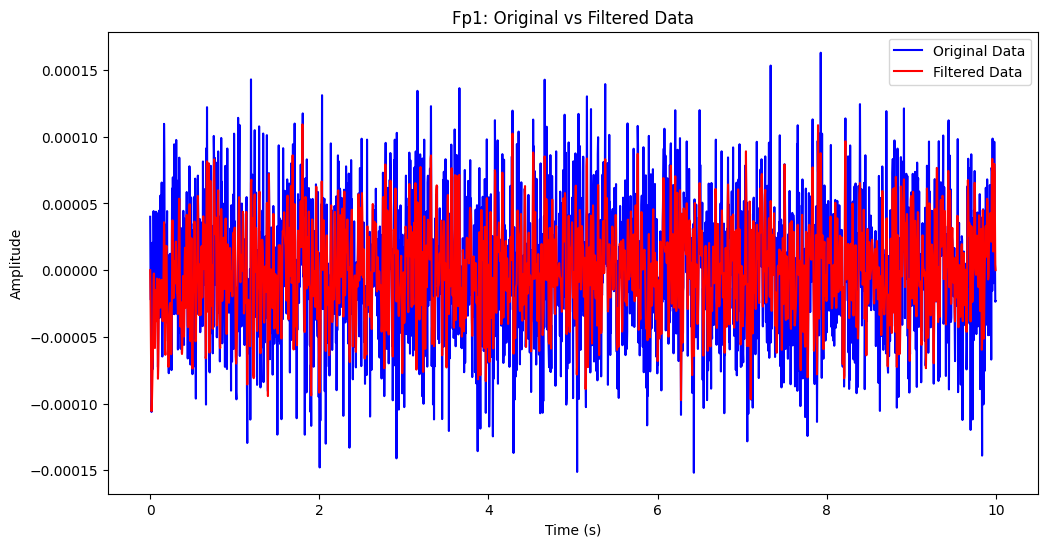

In [ ]:
import numpy as np
import mne
import matplotlib.pyplot as plt

# Define the channel names, types, and sampling rate
ch_names = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'EOG']
ch_types = ['eeg'] * 8 + ['eog']
sfreq = 250

# Simulate the EEG and EOG data
n_times = 2500  # Number of time points
eeg_data = np.random.randn(8, n_times) * 50e-6  # Simulate EEG data and scale to a realistic range
eog_data = np.random.randn(1, n_times) * 150e-6  # Simulate EOG data and scale to a realistic range

# Combine the EEG and EOG data
combined_data = np.vstack([eeg_data, eog_data])

# Create an MNE info dictionary
info = mne.create_info(ch_names, sfreq, ch_types=ch_types)

# Create an MNE Raw object from the combined EEG and EOG data
raw = mne.io.RawArray(combined_data, info)

# Apply a band-pass filter
raw_filtered = raw.copy().filter(1, 50)

# Select a channel to visualize
channel_to_visualize = 0  # You can change this value to select a different channel

# Get the data and times for the selected channel
original_data, times = raw[channel_to_visualize]
filtered_data, _ = raw_filtered[channel_to_visualize]

# Squeeze the data arrays to match the dimensions with the times array
original_data = original_data.squeeze()
filtered_data = filtered_data.squeeze()

# Plot the original data (non-filtered) and the filtered data on a single plot
plt.figure(figsize=(12, 6))
plt.plot(times, original_data, label='Original Data', color='blue')
plt.plot(times, filtered_data, label='Filtered Data', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'{ch_names[channel_to_visualize]}: Original vs Filtered Data')
plt.legend()
plt.show()


#Artifact removal

In [ ]:
!pip install mne
!pip install --upgrade mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 36.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Creating RawArray with float64 data, n_channels=10, n_times=2500
    Range : 0 ... 2499 =      0.000 ...     9.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 825 samples (3.300 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 8 components
Fitting ICA took 0.1s.
Using EOG channel: EOG
... filtering ICA sources
Setting up ba

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
<ipython-input-54-0352569643a8>:45: RuntimeWarning: Using n_components=8 (resulting in n_components_=8) may lead to an unstable mixing matrix estimation because the ratio between the largest (2.5) and smallest (1.4e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 7
  ica.fit(raw_filtered_with_artifacts)
<ipython-input-54-0352569643a8>:51: RuntimeWarning: filter_length (4096) is longer than the signal (2500), distortion is likely. Reduce filter length or filter a longer signal.
  e

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)

Using threshold: 0.32 for CTPS ECG detection


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
<ipython-input-54-0352569643a8>:51: RuntimeWarning: filter_length (4096) is longer than the signal (2500), distortion is likely. Reduce filter length or filter a longer signal.
  eog_inds, eog_scores = ica.find_bads_eog(raw_filtered_with_artifacts, ch_name='EOG')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using channel ECG to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 2500 samples (10.000 sec)

Number of ECG events detected : 16 (average pulse 96 / min.)


<ipython-input-54-0352569643a8>:55: RuntimeWarning: filter_length (4096) is longer than the signal (2500), distortion is likely. Reduce filter length or filter a longer signal.
  ecg_inds, ecg_scores = ica.find_bads_ecg(raw_filtered_with_artifacts, ch_name='ECG')


Not setting metadata
16 matching events found
No baseline correction applied
Using data from preloaded Raw for 16 events and 251 original time points ...
2 bad epochs dropped
Applying ICA to Raw instance
    Transforming to ICA space (8 components)
    Zeroing out 0 ICA components
    Projecting back using 8 PCA components


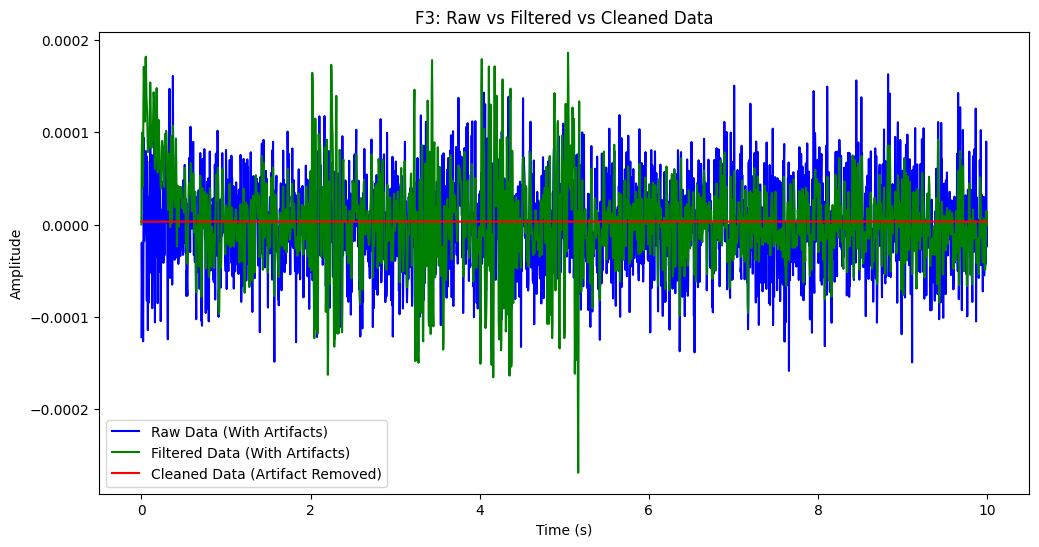

In [ ]:
import numpy as np
import mne
import matplotlib.pyplot as plt

# Define the channel names, types, and sampling rate
ch_names = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'EOG', 'ECG']
ch_types = ['eeg'] * 8 + ['eog', 'ecg']
sfreq = 250

# Simulate the EEG, EOG, and ECG data
n_times = 2500  # Number of time points
eeg_data = np.random.randn(8, n_times) * 50e-6  # Simulate EEG data and scale to a realistic range
eog_data = np.random.randn(1, n_times) * 500e-6  # Simulate EOG data and scale to a stronger range
ecg_data = np.random.randn(1, n_times) * 500e-6  # Simulate ECG data and scale to a stronger range

# Create an info object
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# Add artifacts to the EEG data
eeg_data_with_artifacts = eeg_data.copy()

# Add EOG artifacts to EEG data (eye blinks)
eeg_data_with_artifacts[0, 500:600] += np.random.randn(100) * 5e-4  # Add EOG artifact to channel Fp1
eeg_data_with_artifacts[1, 1000:1100] += np.random.randn(100) * 5e-4  # Add EOG artifact to channel Fp2

# Add ECG artifacts to EEG data (heartbeat)
eeg_data_with_artifacts[4, 800:900] += np.random.randn(100) * 5e-4  # Add ECG artifact to channel C3
eeg_data_with_artifacts[5, 1200:1300] += np.random.randn(100) * 5e-4  # Add ECG artifact to channel C4

# Add EMG artifacts to EEG data (muscle artifacts)
eeg_data_with_artifacts[3, 1500:1600] += np.random.randn(100) * 5e-4  # Add EMG artifact to channel F4

# Combine the EEG, EOG, and ECG data
combined_data_with_artifacts = np.vstack([eeg_data_with_artifacts, eog_data, ecg_data])

# Create an MNE Raw object from the combined EEG, EOG, and ECG data with artifacts
raw_with_artifacts = mne.io.RawArray(combined_data_with_artifacts, info)

# Apply a band-pass filter
raw_filtered_with_artifacts = raw_with_artifacts.copy()
raw_filtered_with_artifacts.filter(1, 50)

# Set EEG reference to average reference
raw_filtered_with_artifacts.set_eeg_reference(ref_channels='average')

# Fit the ICA to the raw data with artifacts
ica = mne.preprocessing.ICA(n_components=8, method='fastica', random_state=42, max_iter=1000)
ica.fit(raw_filtered_with_artifacts)

# Identify and remove artifact components
ica.exclude = []

# Identify and remove EOG artifacts
eog_inds, eog_scores = ica.find_bads_eog(raw_filtered_with_artifacts, ch_name='EOG')
ica.exclude.extend(eog_inds)

# Identify and remove ECG artifacts
ecg_inds, ecg_scores = ica.find_bads_ecg(raw_filtered_with_artifacts, ch_name='ECG')
ica.exclude.extend(ecg_inds)

# Apply ICA to remove artifact components
raw_filtered_cleaned = raw_filtered_with_artifacts.copy()
ica.apply(raw_filtered_cleaned)

# Get the data and times for the selected channel
raw_data, times = raw_with_artifacts[channel_to_visualize]
filtered_data, _ = raw_filtered_with_artifacts[channel_to_visualize]
filtered_cleaned_data, _ = raw_filtered_cleaned[channel_to_visualize]

# Squeeze the data arrays to match the dimensions with the times array
raw_data = raw_data.squeeze()
filtered_data = filtered_data.squeeze()
filtered_cleaned_data = filtered_cleaned_data.squeeze()

# Plot the raw data with artifacts, the filtered data with artifacts, and the cleaned data after artifact correction on a single plot
plt.figure(figsize=(12, 6))
plt.plot(times, raw_data, label='Raw Data (With Artifacts)', color='blue')
plt.plot(times, filtered_data, label='Filtered Data (With Artifacts)', color




# Select a channel to visualize
channel_to_visualize = 2 # You can change this value to select a different channel


# Get the data and times for the selected channel
raw_data, times = raw_with_artifacts[channel_to_visualize]
filtered_data, _ = raw_filtered_with_artifacts[channel_to_visualize]
filtered_cleaned_data, _ = raw_filtered_cleaned[channel_to_visualize]


# Squeeze the data arrays to match the dimensions with the times array
raw_data = raw_data.squeeze()
filtered_data = filtered_data.squeeze()
filtered_cleaned_data = filtered_cleaned_data.squeeze()

# Plot the filtered data (before artifact correction) and the cleaned data (after artifact correction) on a single plot
plt.figure(figsize=(12, 6))
plt.plot(times, raw_data, label='Raw Data (With Artifacts)', color='blue')
plt.plot(times, filtered_data, label='Filtered Data (With Artifacts)', color='green')
plt.plot(times, filtered_cleaned_data, label='Cleaned Data (Artifact Removed)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'{ch_names[channel_to_visualize]}: Raw vs Filtered vs Cleaned Data')
plt.legend()
plt.show()

# Baseline correction

In [ ]:
# Compute the average signal during a baseline period
baseline_start = 0
baseline_end = 1
baseline = np.mean(eeg_data_cleaned[:, t < baseline_end], axis=1)

# Subtract the baseline from the EEG data
eeg_data_corrected = eeg_data_cleaned - baseline[:, np.newaxis]


#Feature Extraction
After pre-processing, the next step is feature extraction, which involves identifying relevant features from the signal that can be used for further analysis. Features can be time-domain, frequency-domain, or time-frequency features, and are chosen based on the specific application. For example, in EEG studies, features such as power in different frequency bands or coherence between different electrode pairs can be extracted.

#Power Spectral Density (PSD)

In [ ]:
from scipy.signal import welch

# Compute the Power Spectral Density (PSD) for each channel
psd = np.zeros((num_channels, len(f)))
for channel in range(num_channels):
    f, psd[channel, :] = welch(eeg_data_filtered[channel], fs=fs, nperseg=256)

# Compute the total power in each frequency band
delta_power = np.sum(psd[:, np.logical_and(f >= 1, f <= 4)], axis=1)
theta_power = np.sum(psd[:, np.logical_and(f >= 4, f <= 8)], axis=1)
alpha_power = np.sum(psd[:, np.logical_and(f >= 8, f <= 13)], axis=1)
beta_power = np.sum(psd[:, np.logical_and(f >= 13, f <= 30)], axis=1)
gamma_power = np.sum(psd[:, np.logical_and(f >= 30, f <= 50)], axis=1)


#Classification
The final step in the signal processing pipeline is classification, which involves using machine learning algorithms to classify the signal based on the extracted features. Classification algorithms include linear discriminant analysis (LDA), support vector machines (SVM), and artificial neural networks (ANN). The choice of algorithm depends on the specific application and the nature of the signal.

Overall, the signal processing pipeline is an iterative process, where each step builds upon the previous one. By following this pipeline, researchers can extract meaningful information from raw signals and gain insights into complex systems such as the human brain.

I hope this explanation provides a clear understanding of the signal processing pipeline. The Python code snippets provided demonstrate how different steps in the pipeline can be implemented using the scipy library.

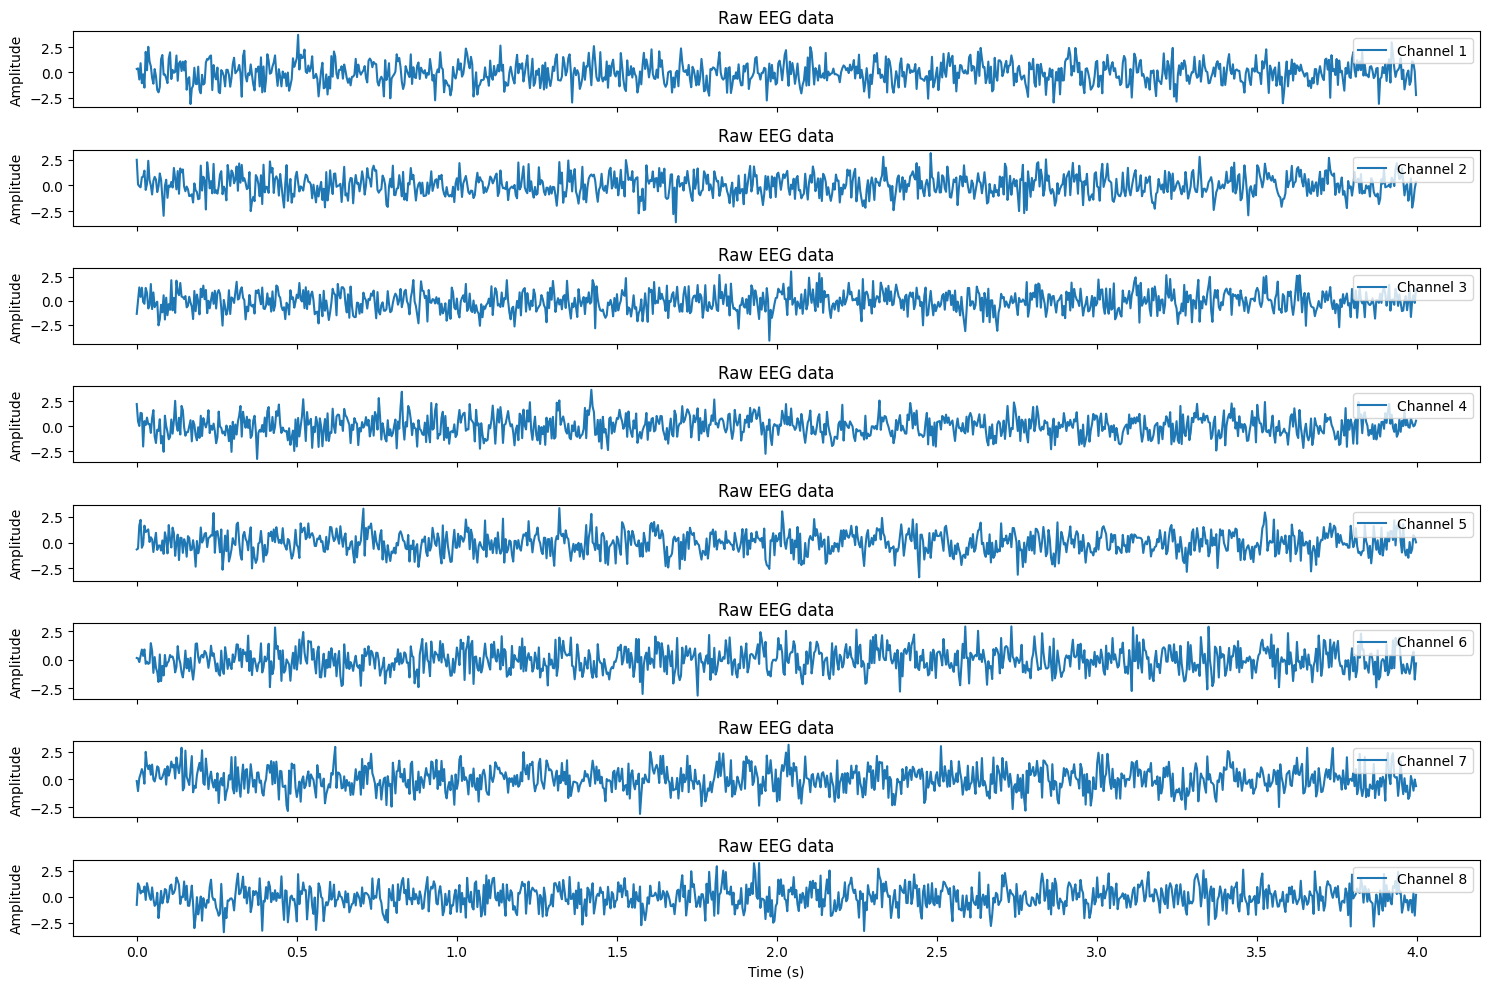

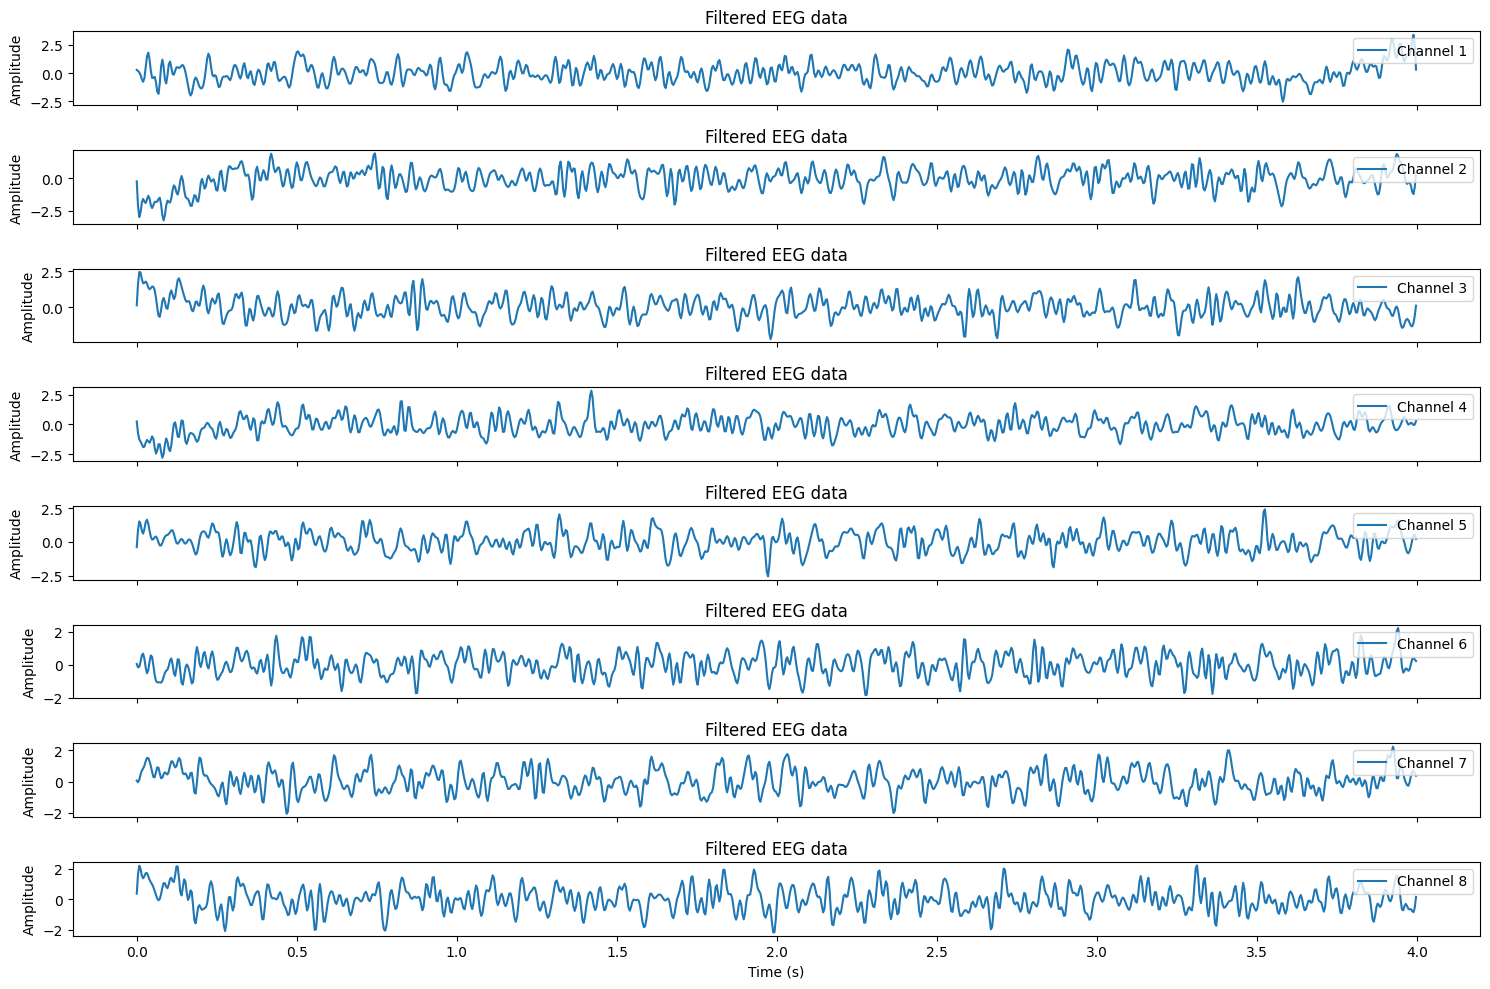

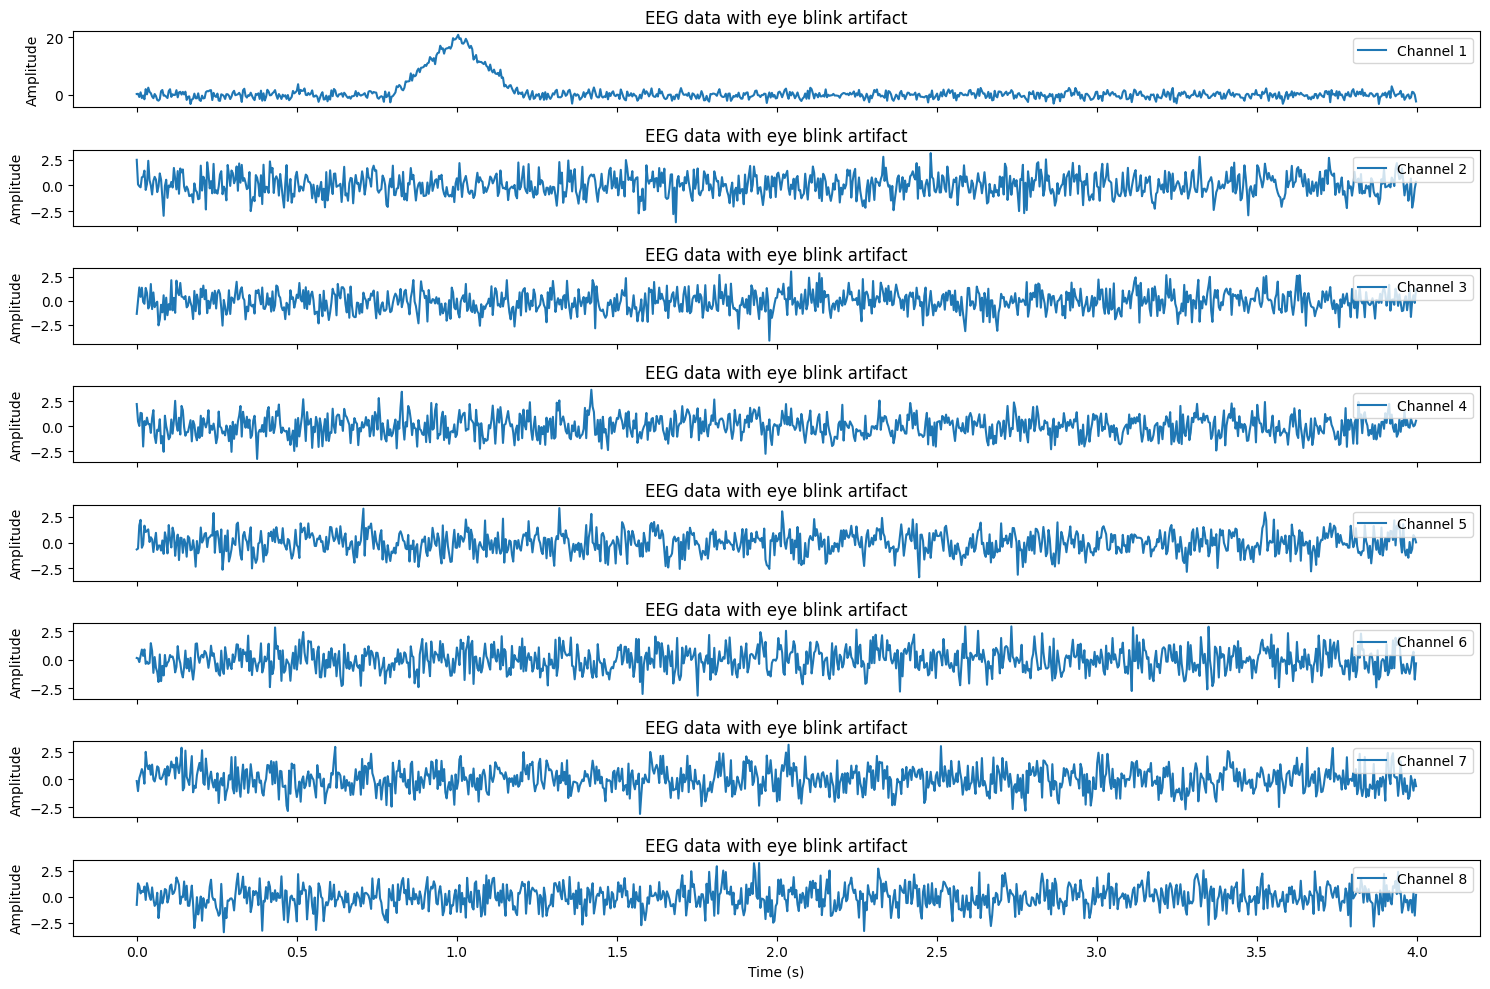

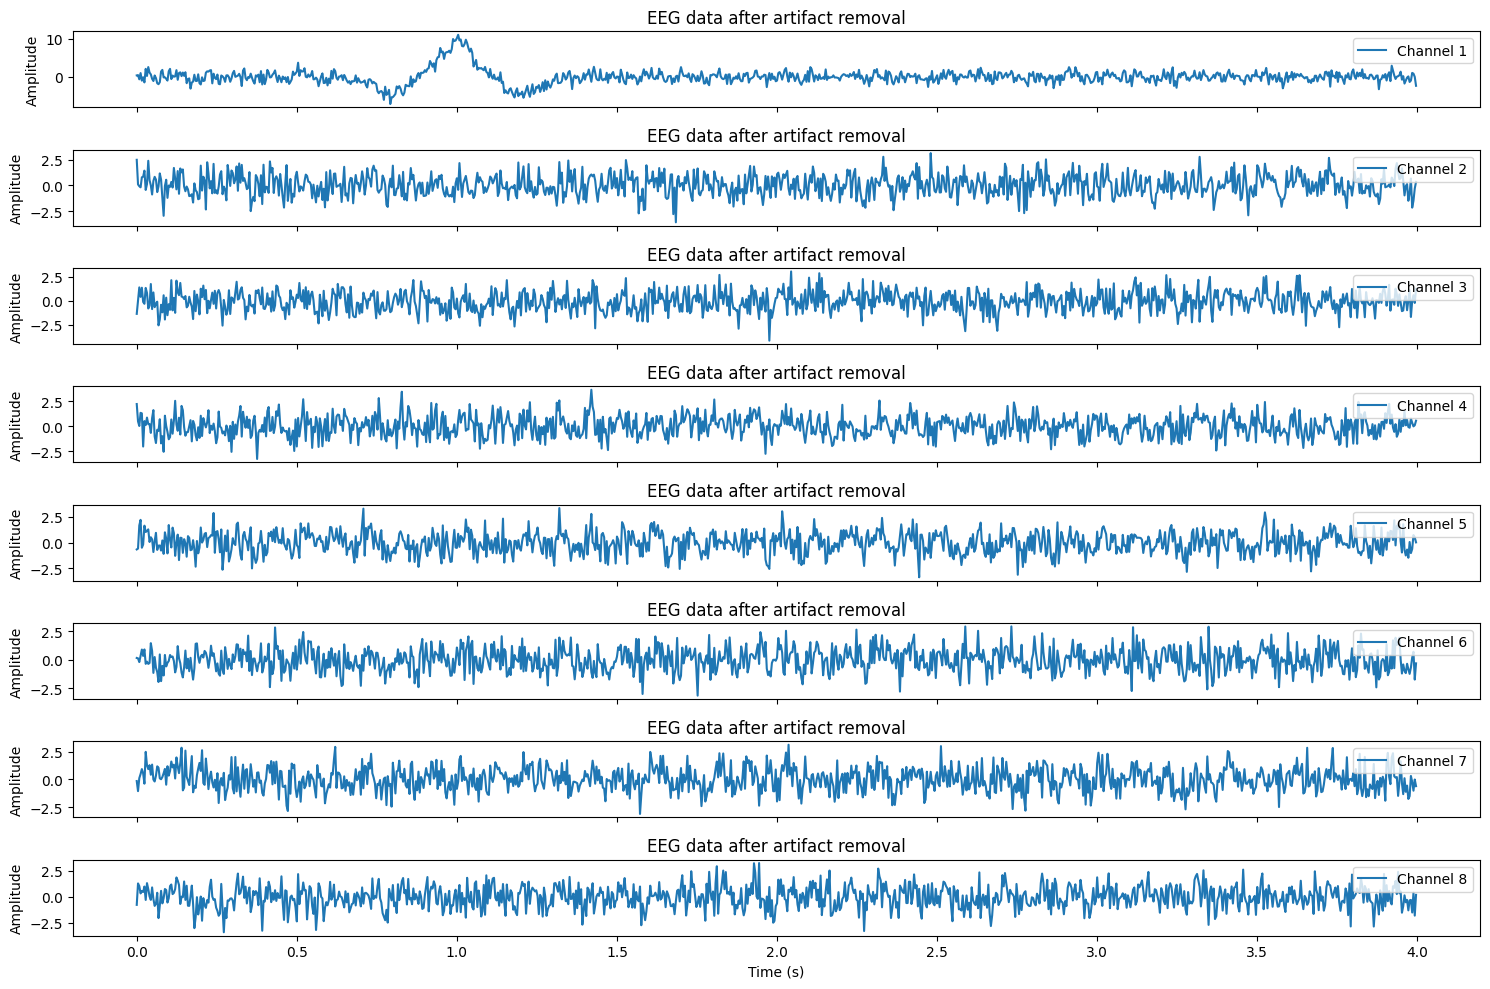

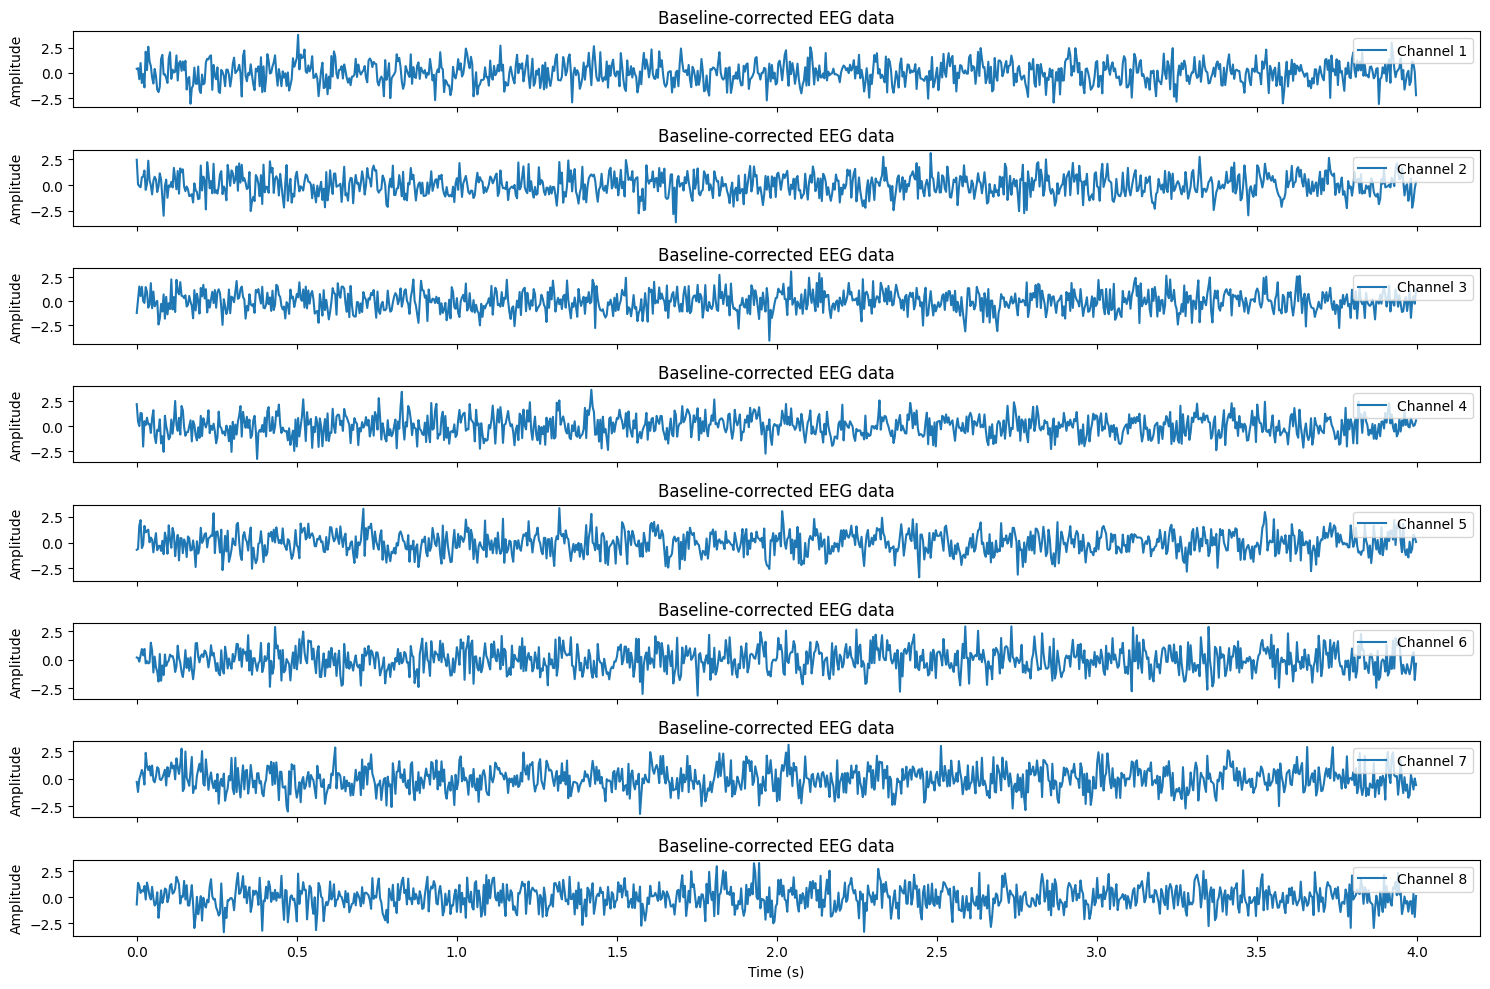

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, detrend

# Simulate 8-channel EEG data
n_channels = 8
n_samples = 1000
sampling_rate = 250
time = np.linspace(0, n_samples / sampling_rate, n_samples)
eeg_data = np.random.normal(0, 1, (n_channels, n_samples))

# Add an alpha oscillation (10 Hz) to the simulated EEG data
for i in range(n_channels):
    eeg_data[i] += 0.5 * np.sin(2 * np.pi * 10 * time)

# Filter function
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype="band")
    y = filtfilt(b, a, data)
    return y

# Apply bandpass filter (1-50 Hz)
filtered_eeg = np.zeros_like(eeg_data)
for i in range(n_channels):
    filtered_eeg[i] = butter_bandpass_filter(eeg_data[i], 1, 50, sampling_rate)

# Simulate eye blink artifact in channel 1
eye_blink = np.zeros(n_samples)
eye_blink[200:250] = np.linspace(0, 20, 50)
eye_blink[250:300] = np.linspace(20, 0, 50)
eeg_data_with_artifact = eeg_data.copy()
eeg_data_with_artifact[0] += eye_blink

# Remove eye blink artifact using sliding window average
artifact_removed_eeg = eeg_data_with_artifact.copy()
artifact_removed_eeg[0] = artifact_removed_eeg[0] - np.convolve(artifact_removed_eeg[0], np.ones(100) / 100, mode='same')

# Apply baseline correction (detrend)
baseline_corrected_eeg = detrend(eeg_data, axis=1)

# Function to plot EEG data
def plot_eeg_data(data, title, channel_labels=None, fs=250):
    n_channels, n_samples = data.shape
    time_vector = np.arange(0, n_samples / fs, 1 / fs)

    fig, axes = plt.subplots(n_channels, 1, figsize=(15, 10), sharex=True)
    for i, ax in enumerate(axes):
        ax.plot(time_vector, data[i], label=channel_labels[i] if channel_labels else f"Channel {i + 1}")
        ax.legend(loc="upper right")
        ax.set_ylabel("Amplitude")
        ax.set_title(title)

    axes[-1].set_xlabel("Time (s)")
    plt.tight_layout()
    plt.show()

# Plot the raw EEG data
plot_eeg_data(eeg_data, "Raw EEG data")

# Plot the filtered EEG data
plot_eeg_data(filtered_eeg, "Filtered EEG data")

# Plot the EEG data with eye blink artifact
plot_eeg_data(eeg_data_with_artifact, "EEG data with eye blink artifact")

# Plot the EEG data after artifact removal
plot_eeg_data(artifact_removed_eeg, "EEG data after artifact removal")

# Plot the baseline-corrected EEG data
plot_eeg_data(baseline_corrected_eeg, "Baseline-corrected EEG data")


# Feature Extraction
Let's perform feature extraction on the preprocessed, filtered, and baseline-corrected EEG data. In this example, we will extract the power in the delta (1-4 Hz), theta (4-8 Hz), alpha (8-12 Hz), and beta (12-30 Hz) frequency bands using the Short-Time Fourier Transform (STFT).


This code first calculates the Short-Time Fourier Transform (STFT) of the filtered and baseline-corrected EEG data. The power spectral density (PSD) is then computed by taking the squared magnitude of the STFT. Next, the power in the delta, theta, alpha, and beta frequency bands is calculated by summing the PSD values within each band. Finally, the power in each frequency band for each channel is plotted over time.

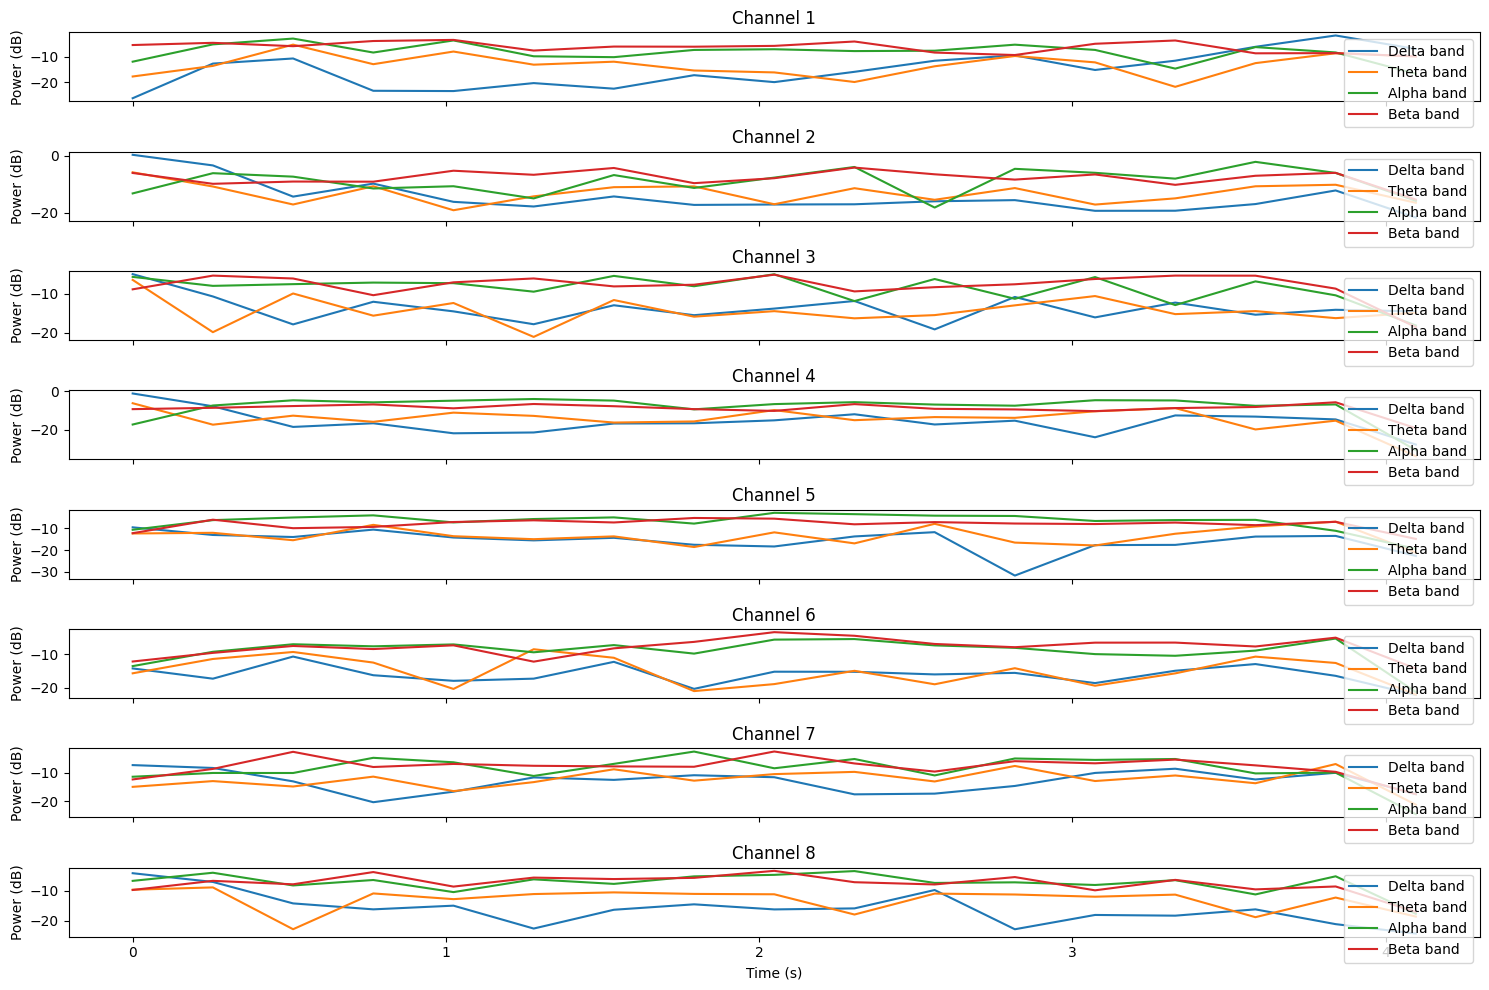

In [21]:
from scipy.signal import stft

# Define frequency bands
bands = {
    "delta": (1, 4),
    "theta": (4, 8),
    "alpha": (8, 12),
    "beta": (12, 30)
}

# STFT parameters
window_size = 128
overlap = 0.5
nfft = 256

# Calculate STFT
frequencies, time_vector, Zxx = stft(filtered_eeg, fs=sampling_rate, window='hann', nperseg=window_size, noverlap=int(window_size * overlap), nfft=nfft)

# Calculate power spectral density (PSD)
psd = np.abs(Zxx) ** 2

# Calculate power in each frequency band
band_power = {}
for band, (low_freq, high_freq) in bands.items():
    freq_mask = np.logical_and(frequencies >= low_freq, frequencies <= high_freq)
    band_power[band] = np.sum(psd[:, freq_mask, :], axis=1)

# Plot the power in each frequency band for each channel
fig, axes = plt.subplots(n_channels, 1, figsize=(15, 10), sharex=True)
for i, ax in enumerate(axes):
    for band in bands.keys():
        ax.plot(time_vector, 10 * np.log10(band_power[band][i]), label=f"{band.capitalize()} band")
    ax.legend(loc="upper right")
    ax.set_ylabel("Power (dB)")
    ax.set_title(f"Channel {i + 1}")

axes[-1].set_xlabel("Time (s)")
plt.tight_layout()
plt.show()


# Classification

To perform classification using the extracted features, we first need to create a dataset with two behavioral conditions: "Yes" and "No". For this example, let's assume we have EEG data for 100 trials with 50 trials corresponding to "Yes" and 50 trials corresponding to "No". We will create a simple dataset using the band powers calculated in the previous step.

First, we need to create a labels array indicating the conditions. In this example, we will use 1 for "Yes" and 0 for "No". Then, we will split the dataset into training and testing sets. Finally, we will train a classifier using the training set and evaluate its performance on the test set. In this example, we will use a Support Vector Machine (SVM) classifier.


This code creates a synthetic dataset with 100 trials and two behavioral conditions, "Yes" and "No". The features (band powers) are concatenated, and the labels are created accordingly. The dataset is then split into training and testing sets. An SVM classifier is trained using the training set and tested on the test set. The accuracy of the classifier is calculated, and the confusion matrix is displayed.

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Create synthetic dataset
n_trials = 100
n_yes_trials = 50
n_no_trials = 50

# Define the frequency bands and number of channels
freq_bands = [(0.5, 4), (4, 8), (8, 12), (12, 30), (30, 100)]
n_channels = 8

# Create synthetic band powers for "Yes" trials
band_power_yes = np.random.rand(n_yes_trials, n_channels, len(freq_bands))

# Create synthetic band powers for "No" trials
band_power_no = np.random.rand(n_no_trials, n_channels, len(freq_bands))

# Add some difference between the "Yes" and "No" trials
band_power_yes[:, :, 0] += 0.5

# Concatenate the band powers from the "Yes" and "No" trials
X = np.concatenate((band_power_yes, band_power_no), axis=0)

# Reshape the input features to be 2D
X = X.reshape(n_trials, -1)

# Create labels for the trials (1 for "Yes" and 0 for "No")
y = np.array([1] * n_yes_trials + [0] * n_no_trials)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)


Accuracy: 0.95
Confusion matrix:
 [[ 7  1]
 [ 0 12]]
